In [ ]:
!nvidia-smi

Fri Sep  5 13:19:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
import os
import ultralytics
ultralytics.checks()

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9kd6fSXSgGKGfplR7dpa")
project = rf.workspace("polyp-e78ji").project("polyp_detection-k9te7")
version = project.version(4)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['polyp']

roboflow:
  workspace: polyp-e78ji
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
model = YOLO("yolo12s.yaml")

In [ ]:
results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/polyp_detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5280.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5281.jpg  weights
labels.jpg			 train_batch5282.jpg


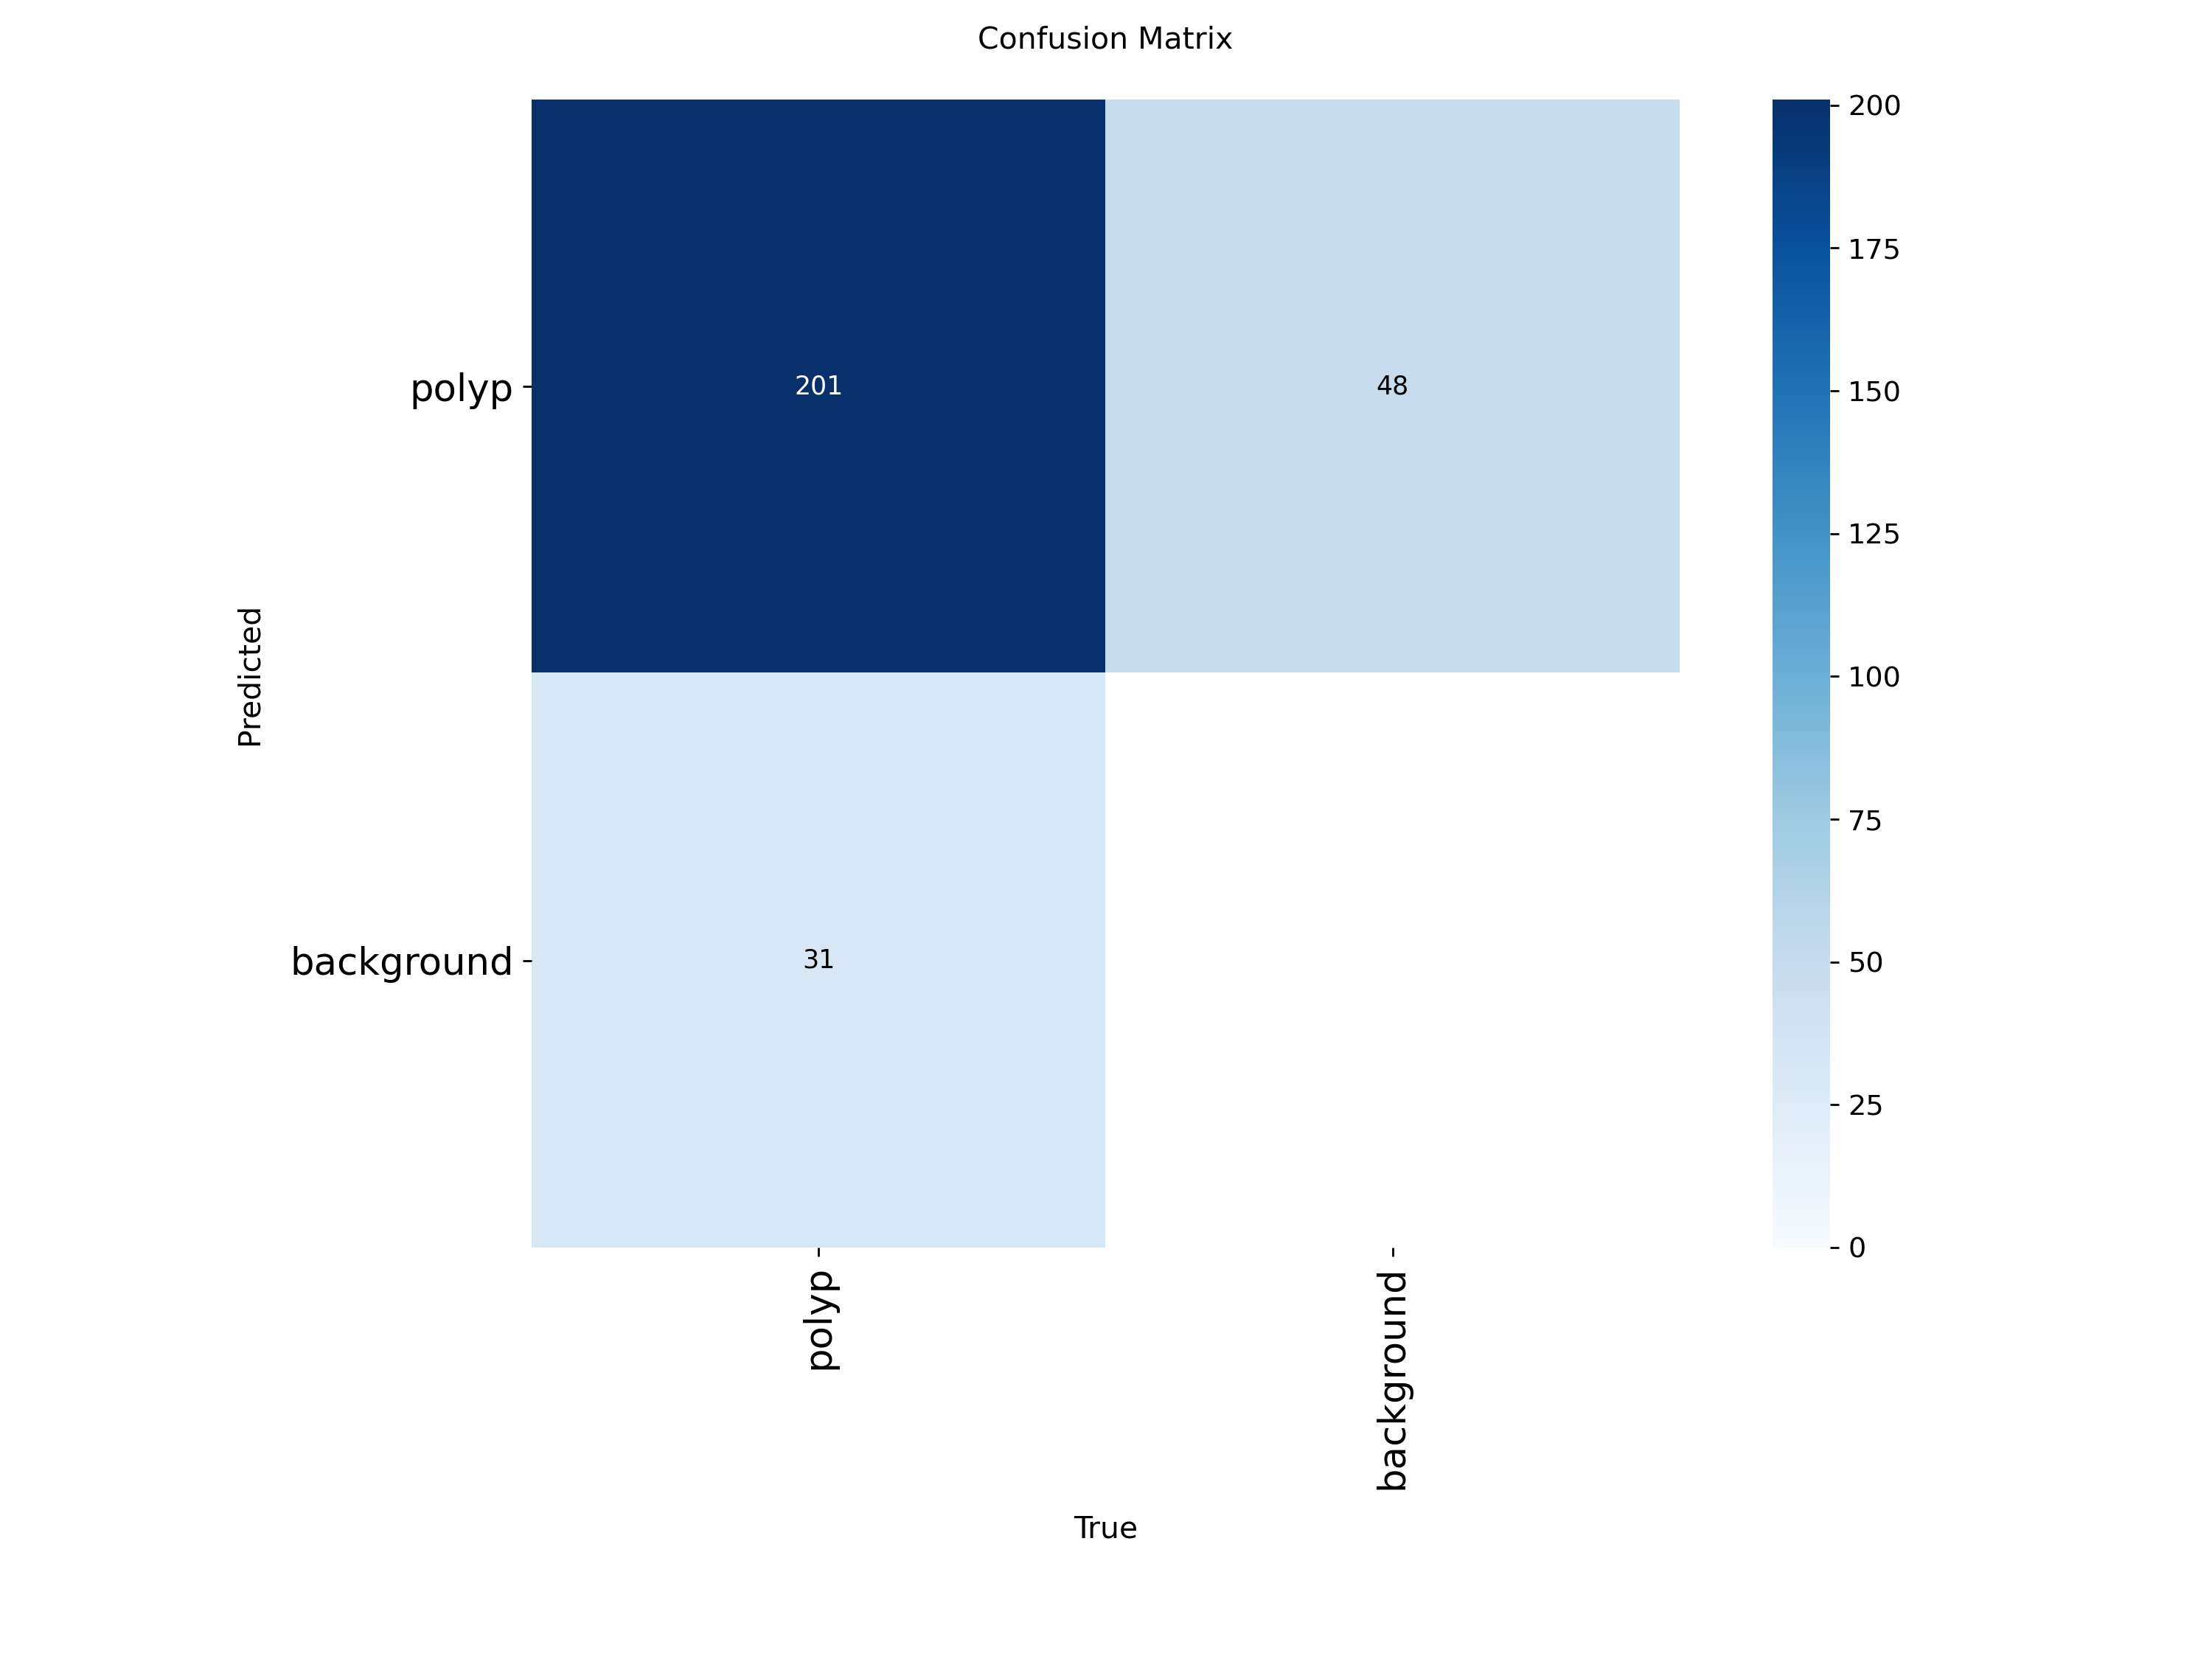

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

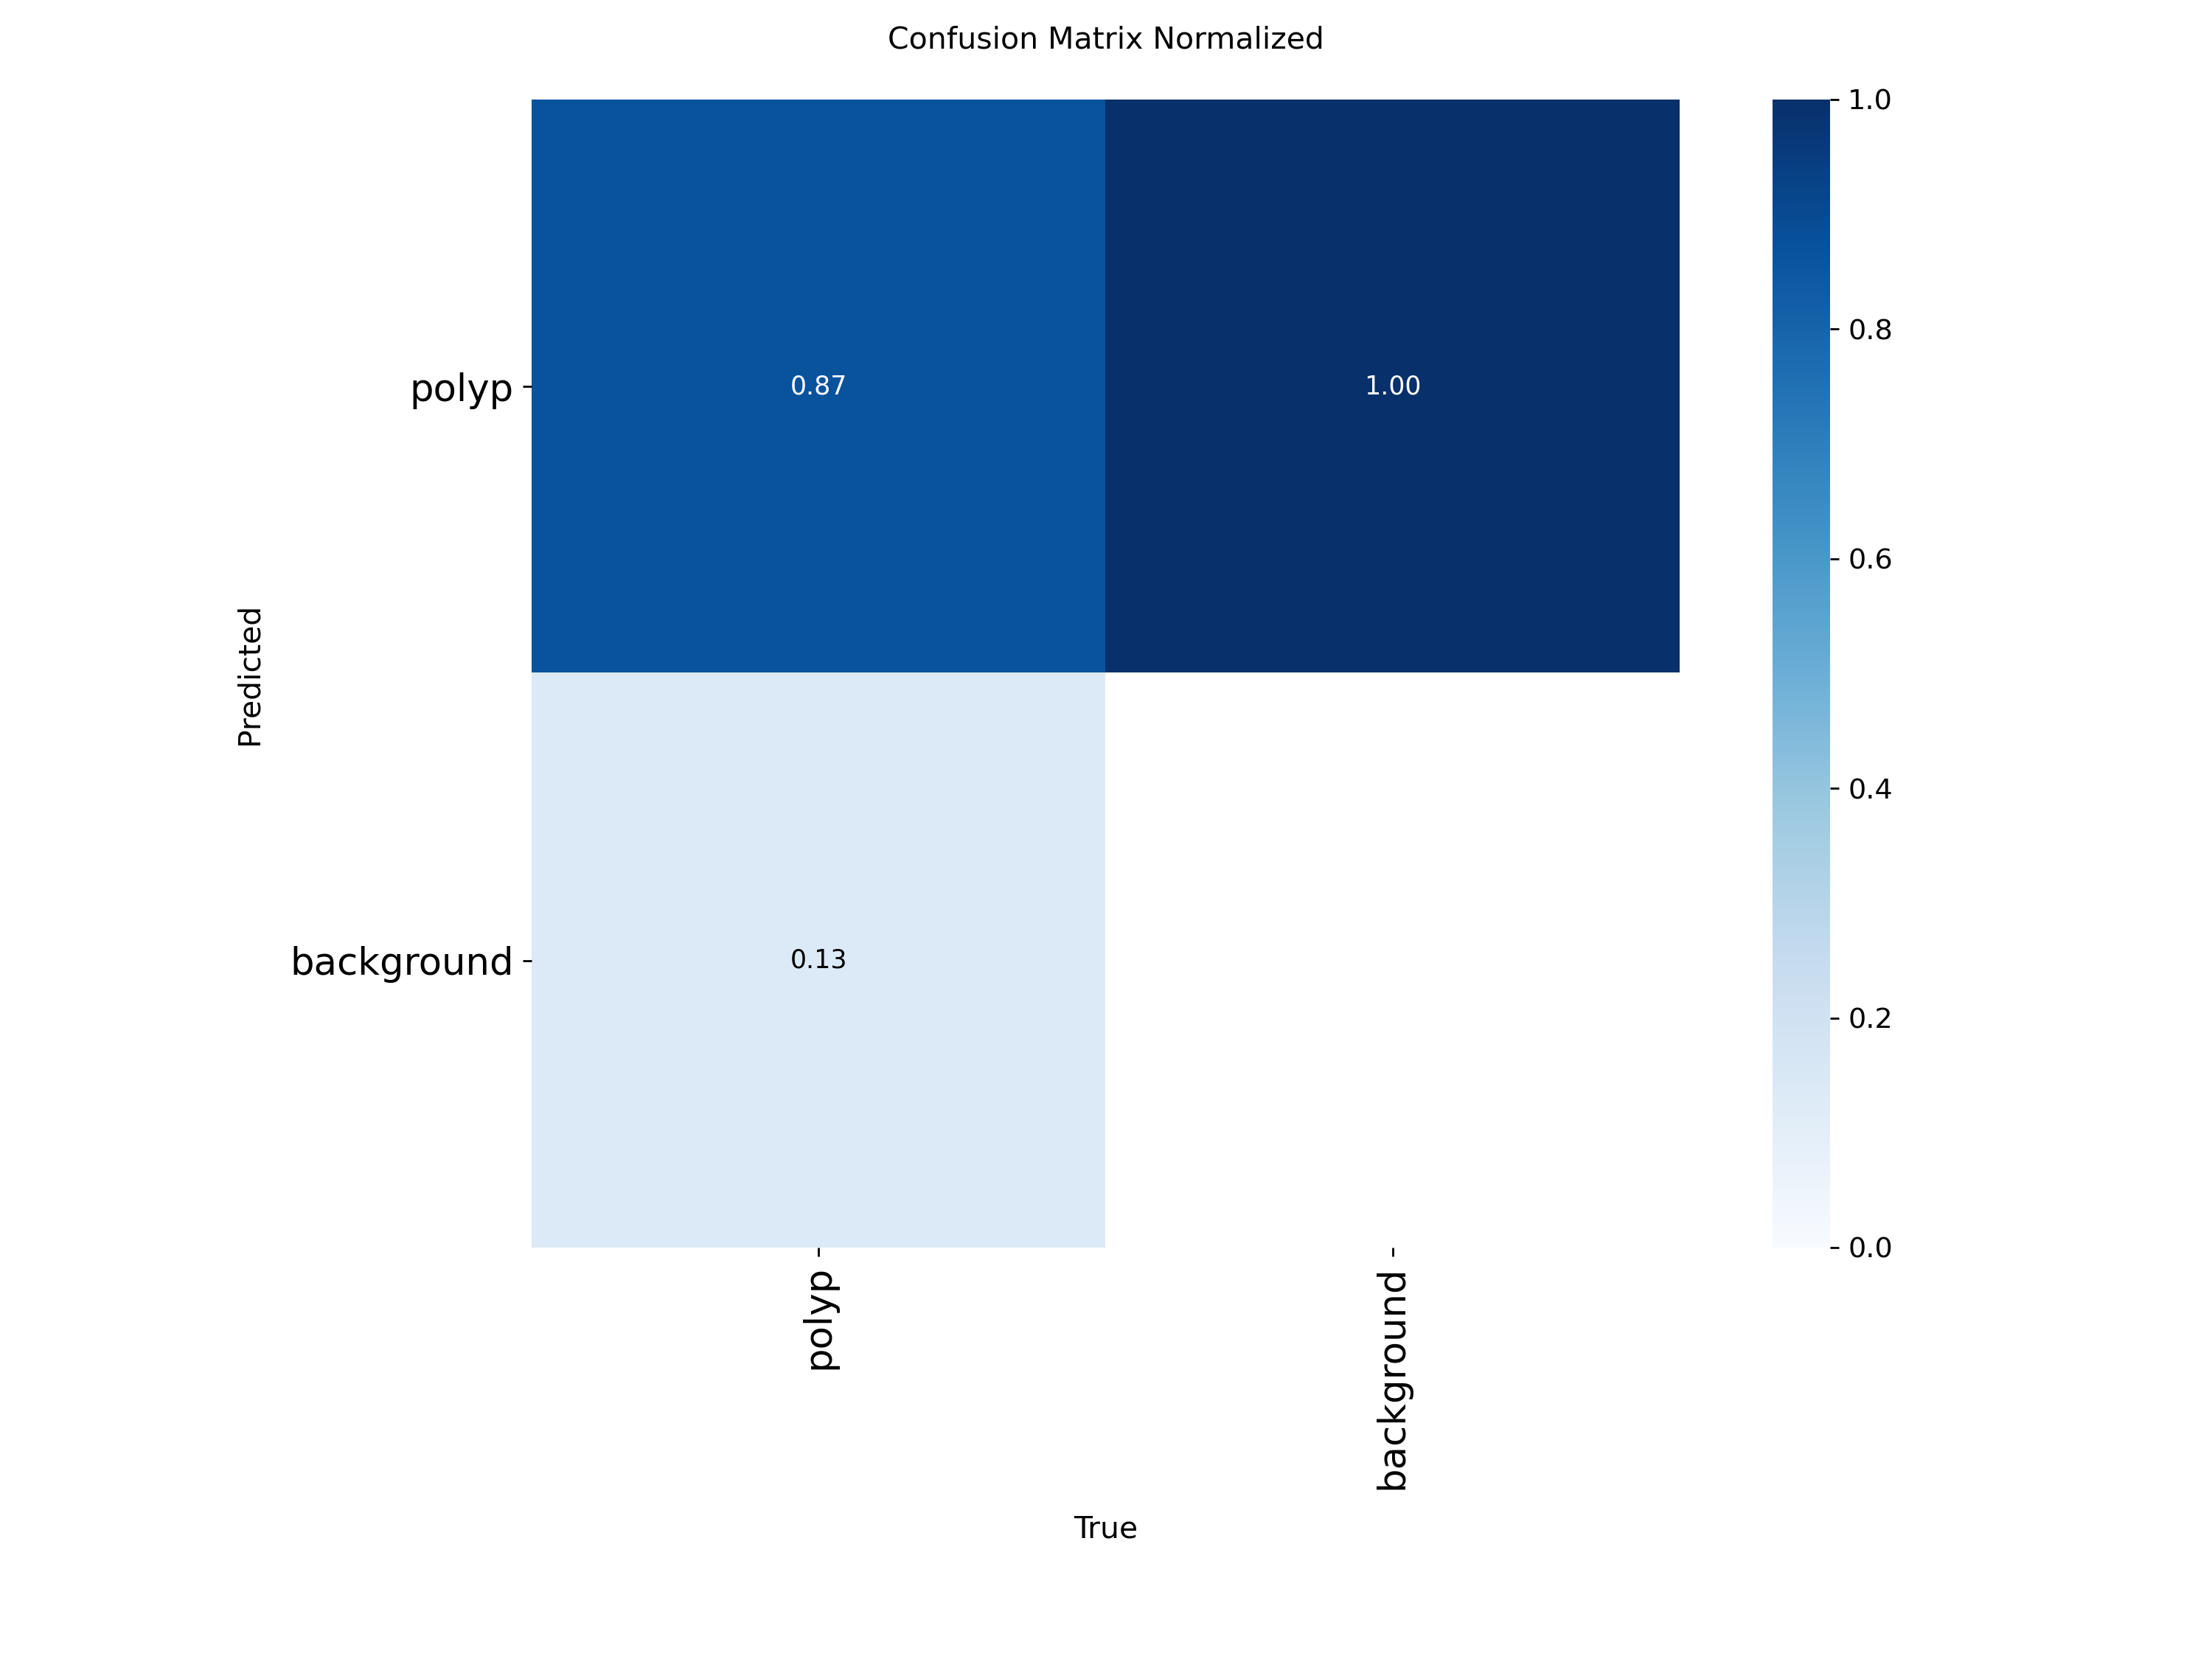

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1000)

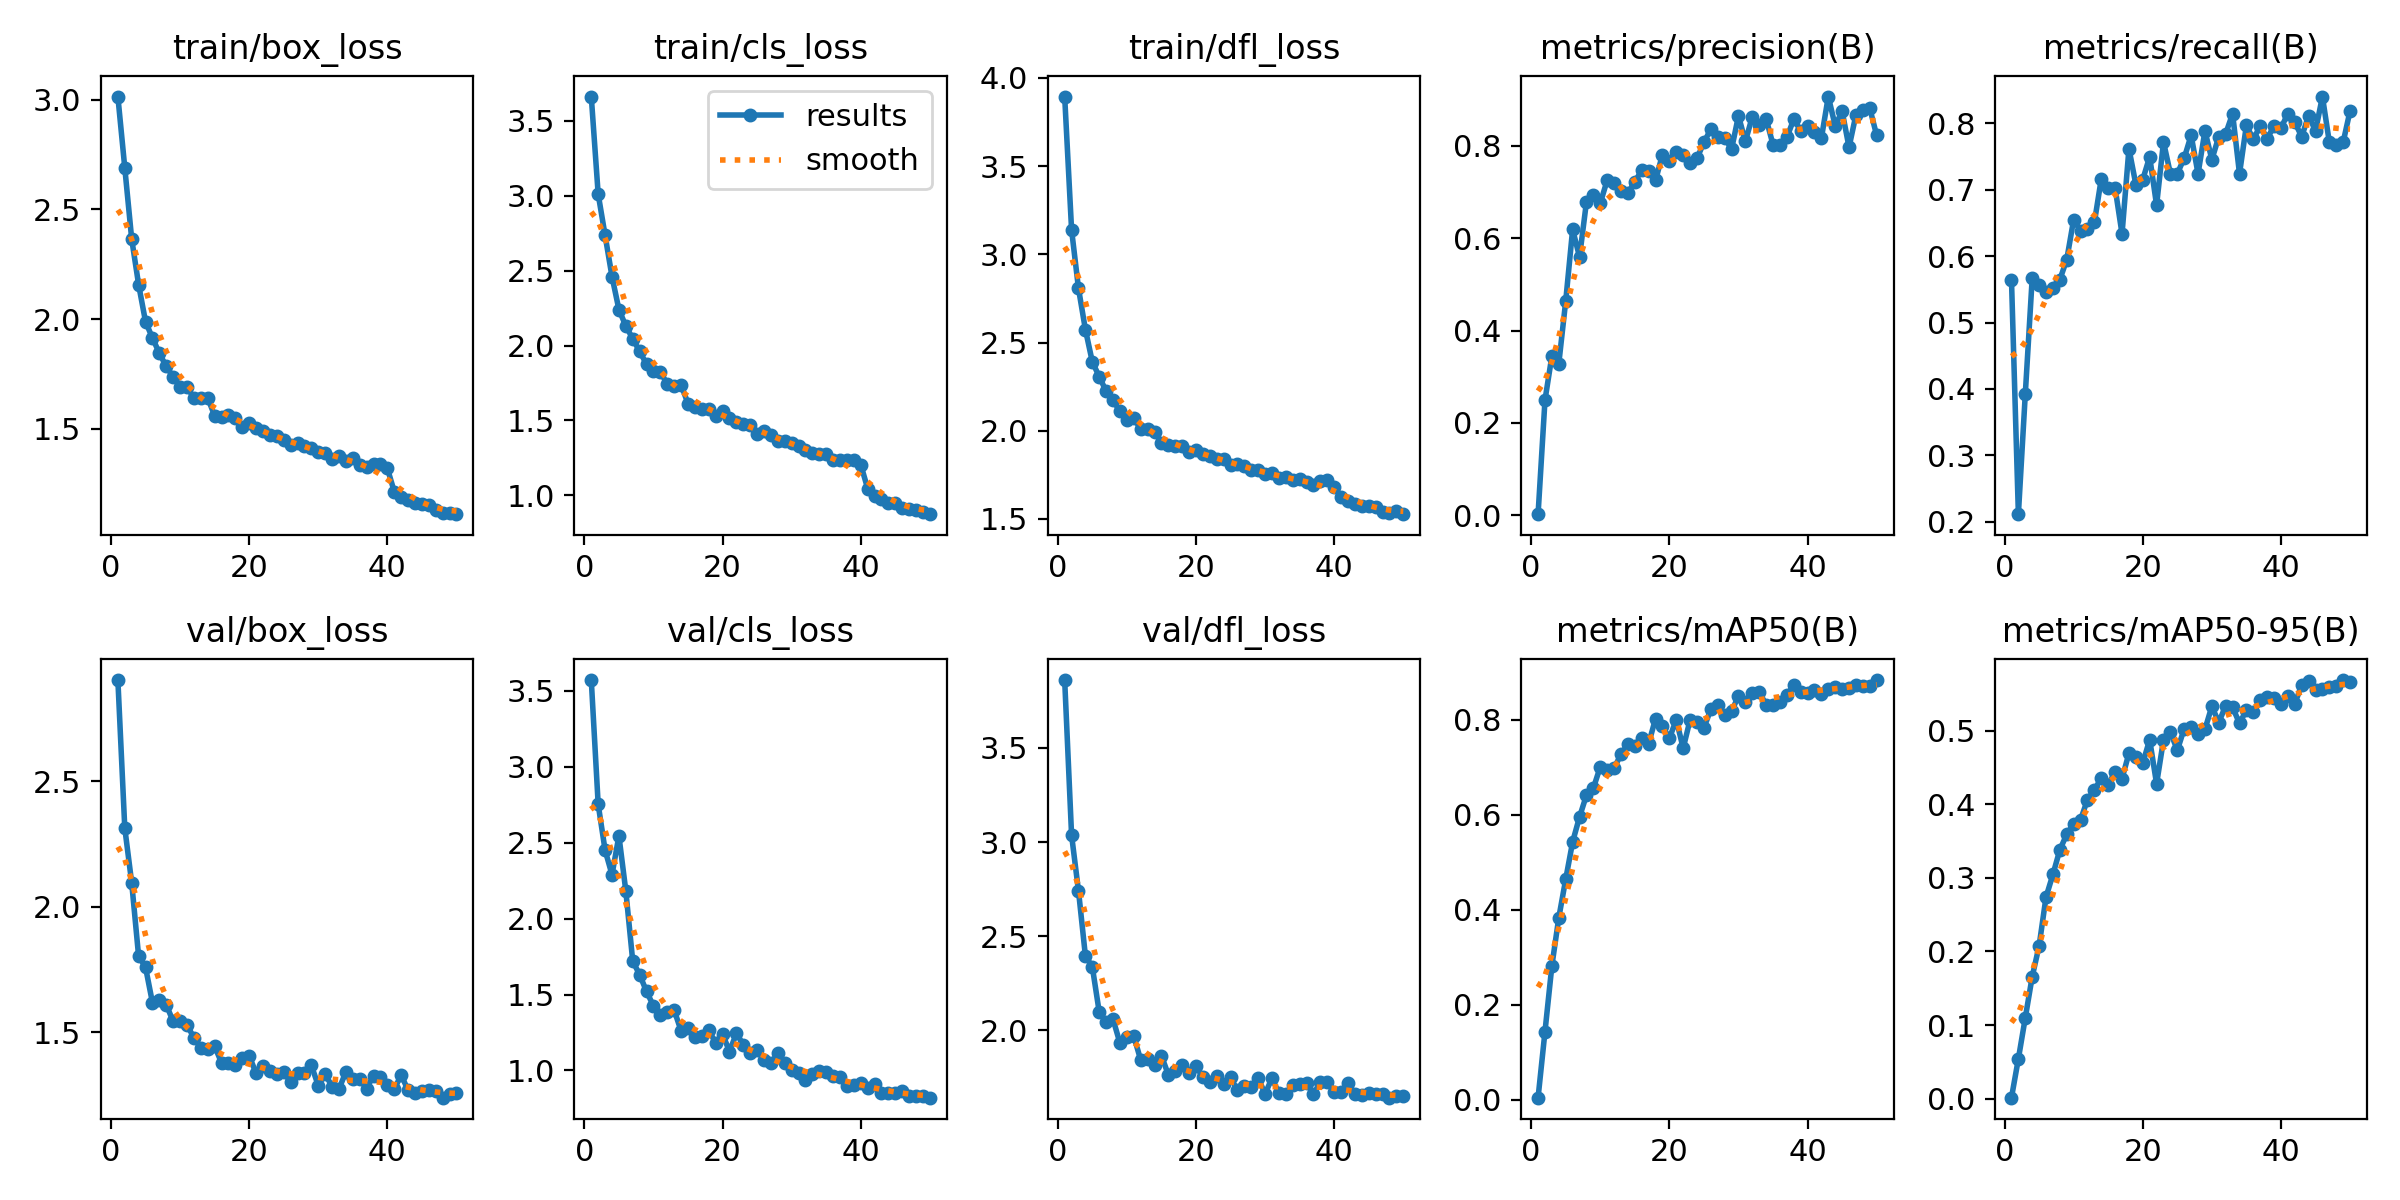

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

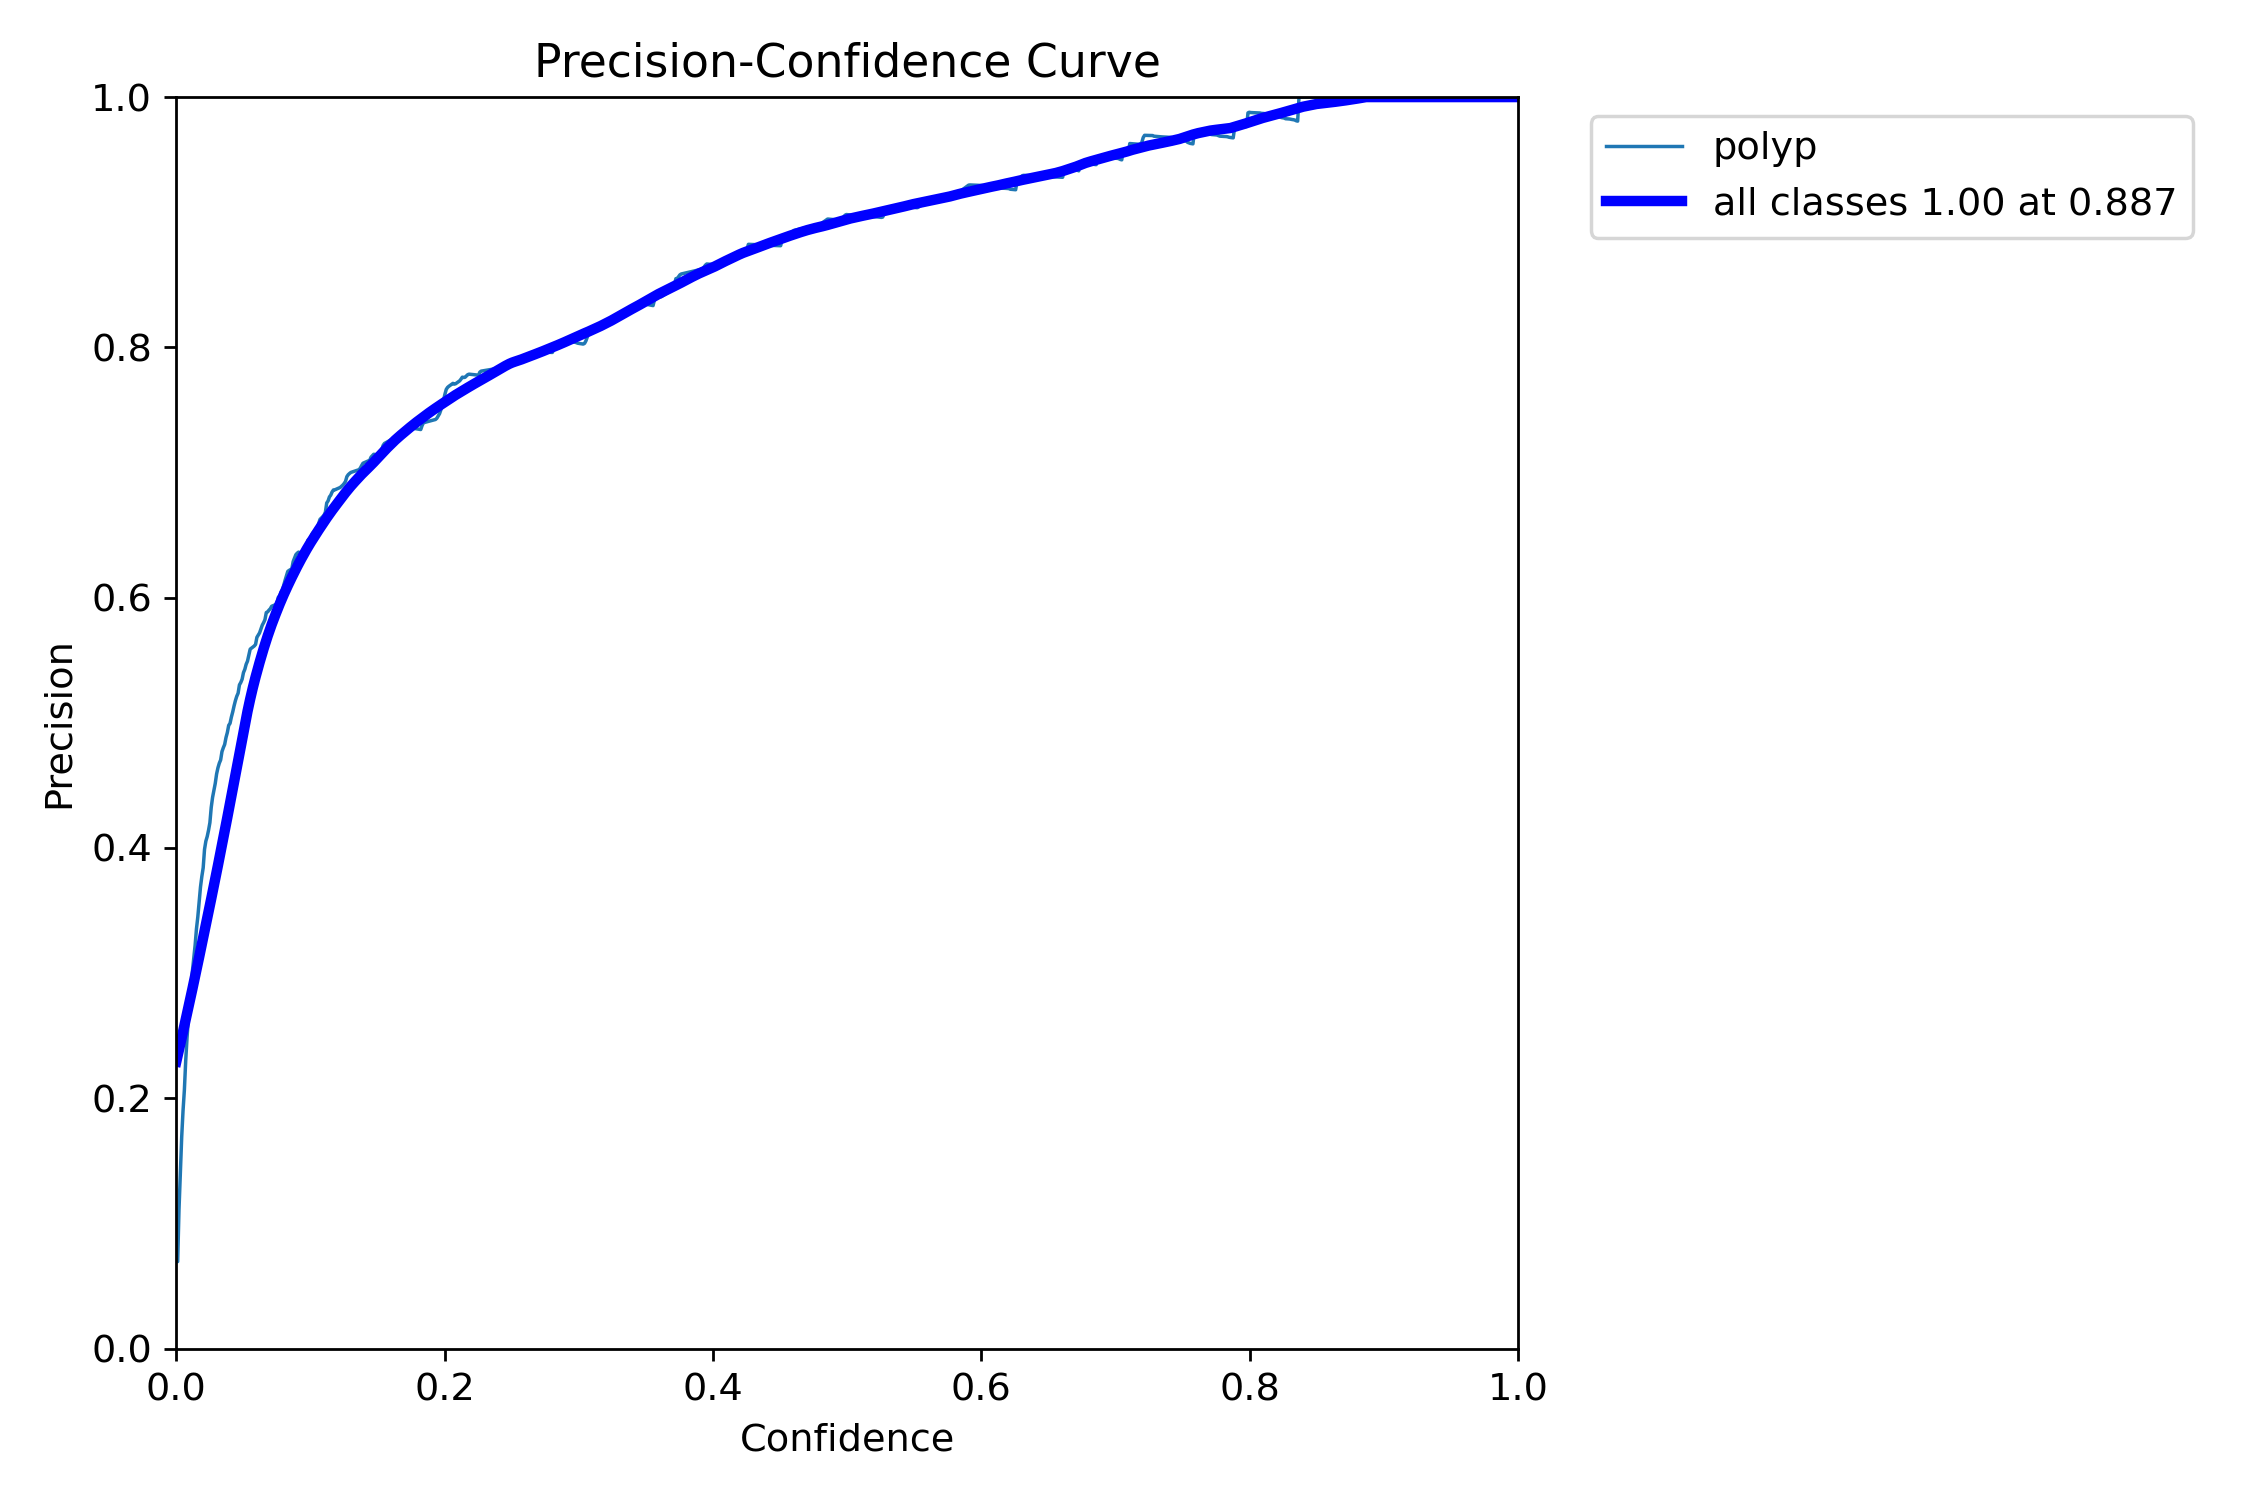

In [ ]:
Image(filename=f'/content/runs/detect/train/BoxP_curve.png', width=1000)

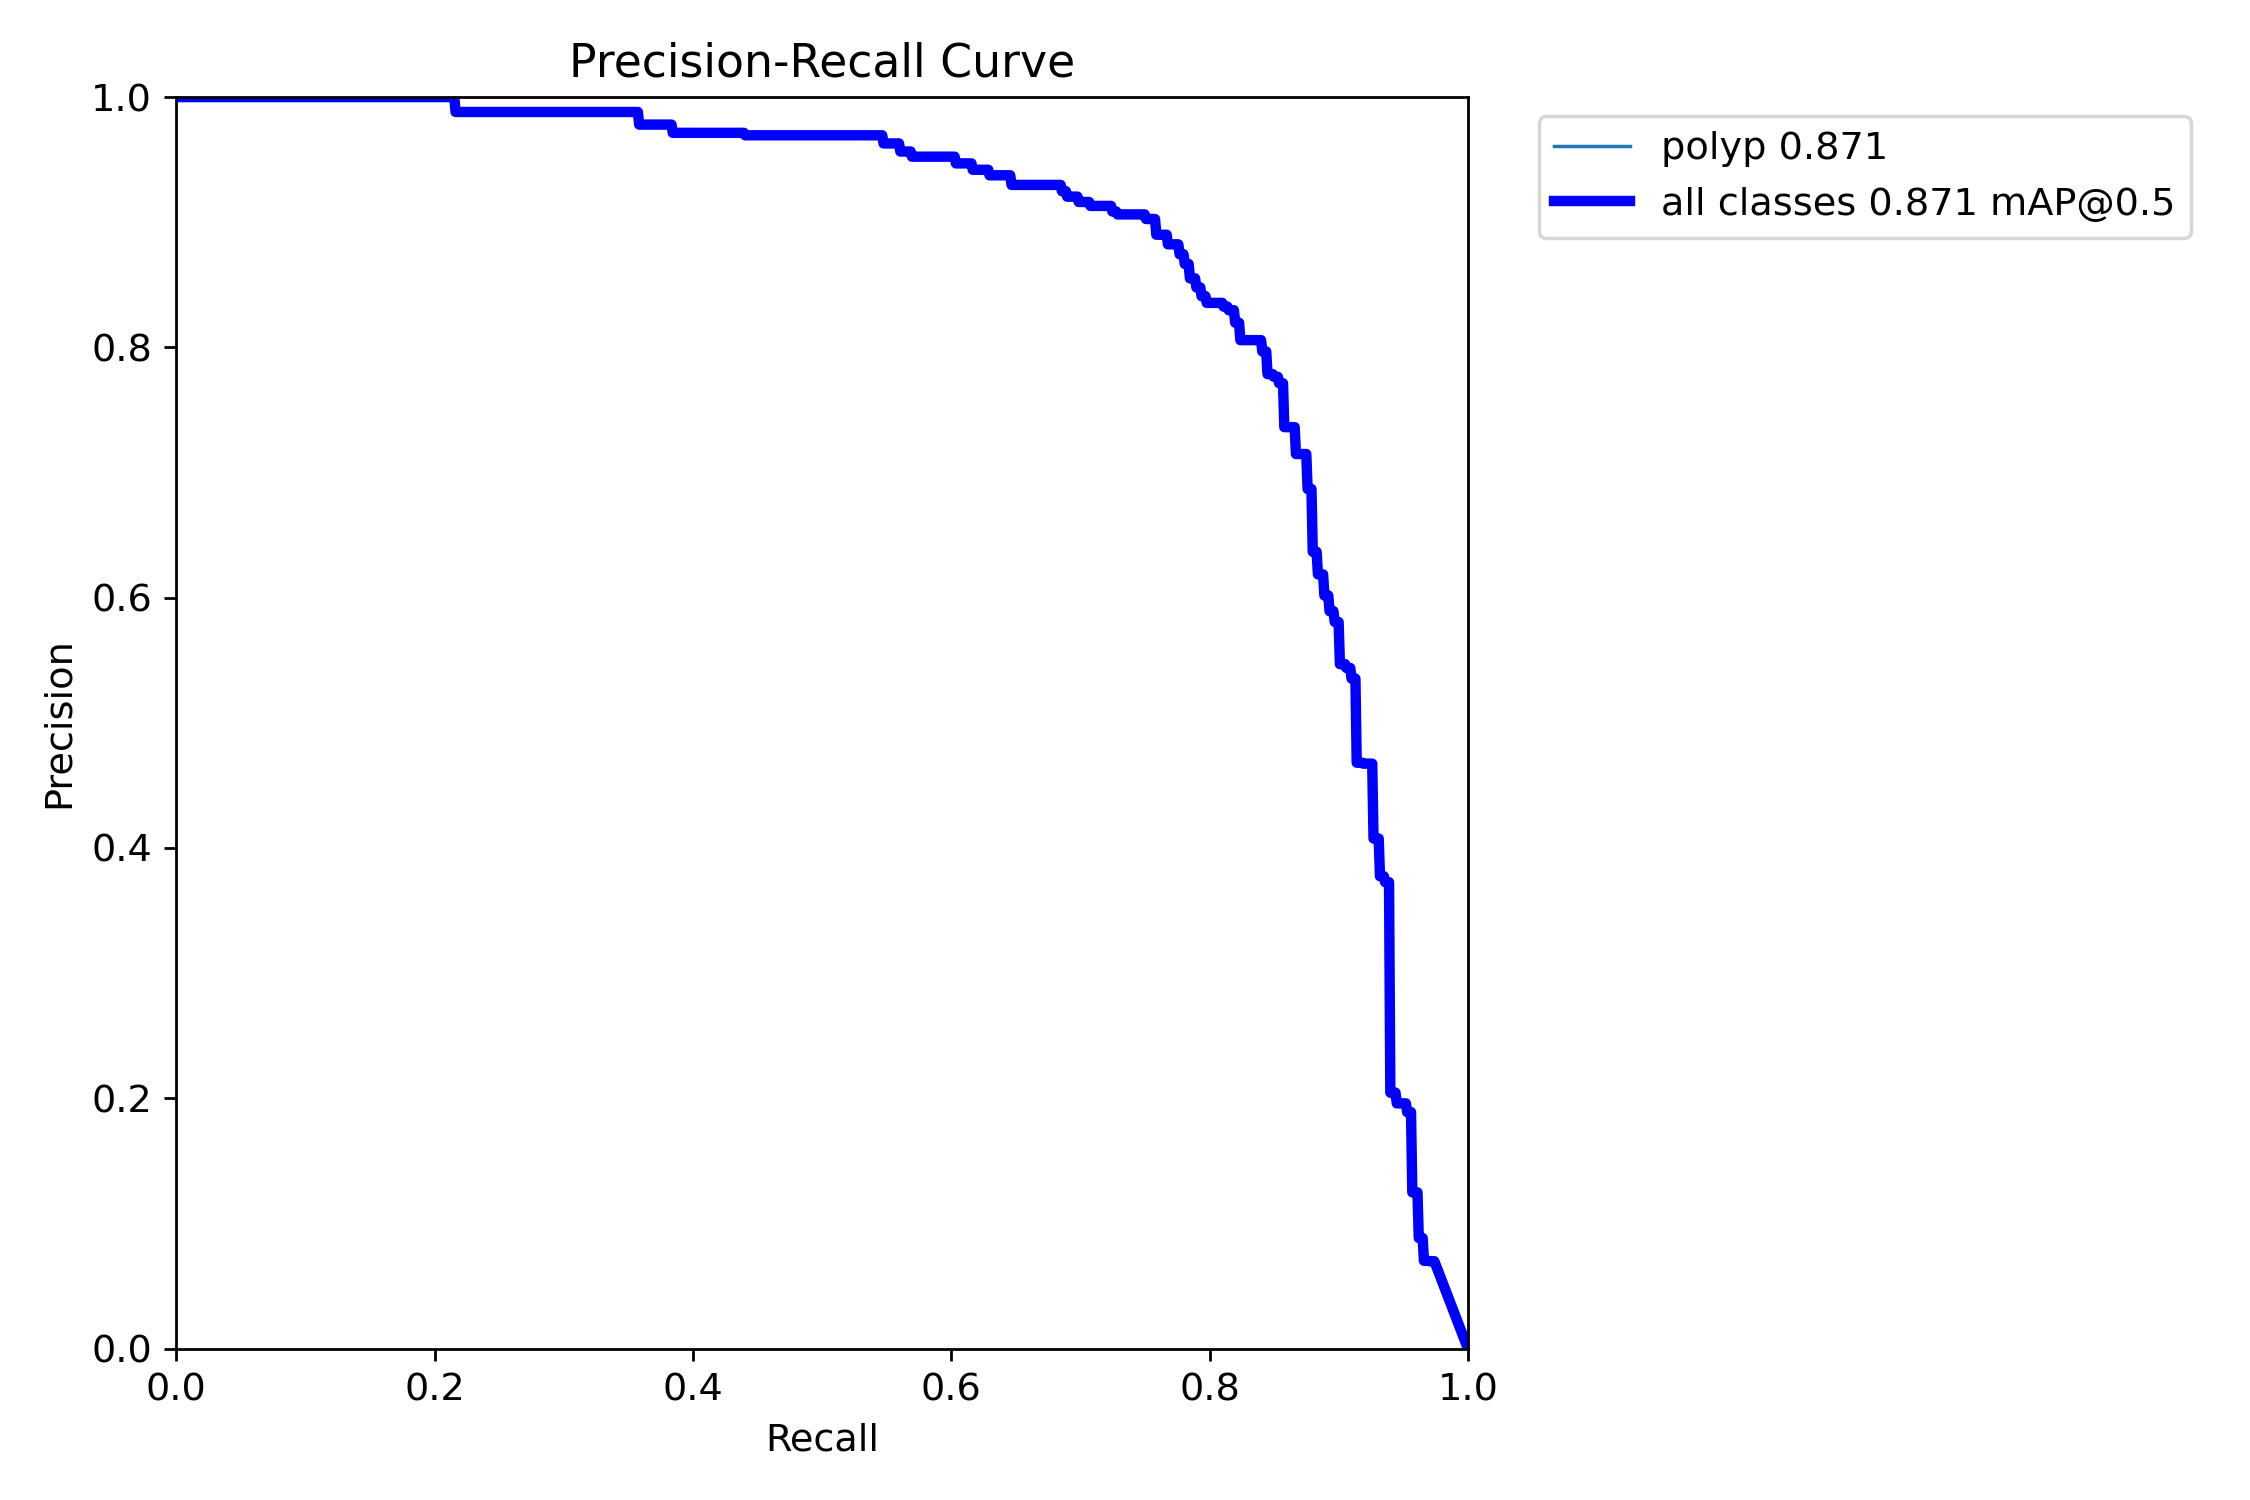

In [ ]:
Image(filename=f'/content/runs/detect/train/BoxPR_curve.png', width=1000)

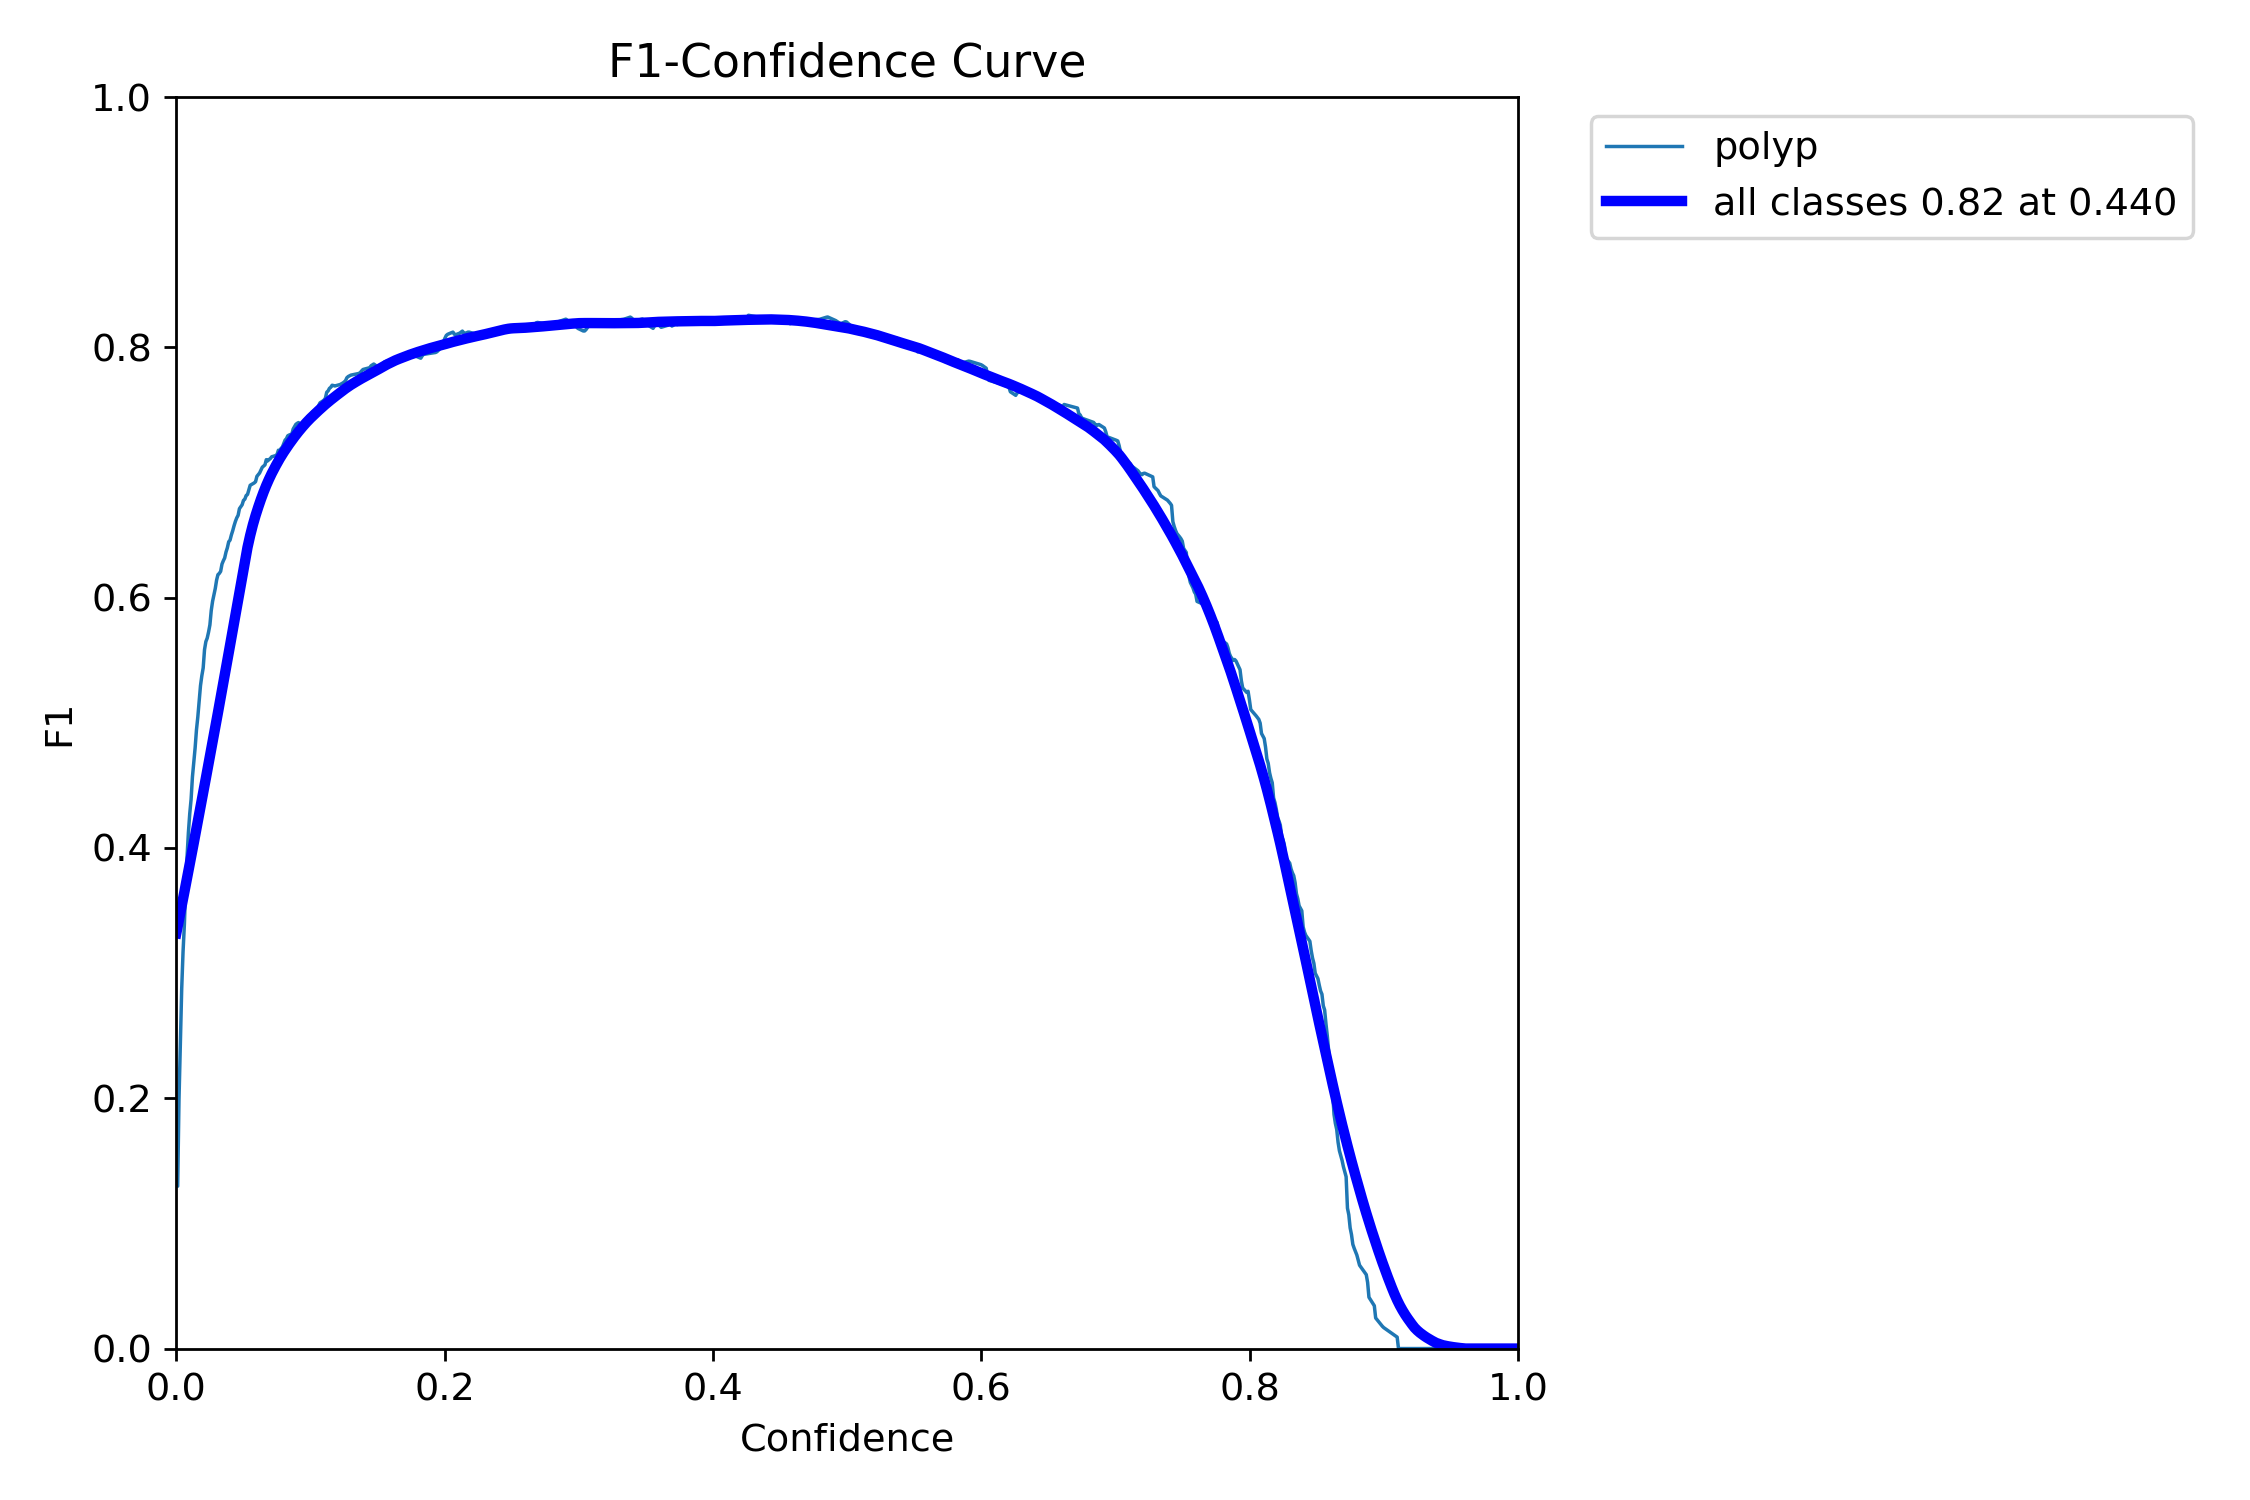

In [ ]:
Image(filename=f'/content/runs/detect/train/BoxF1_curve.png', width=1000)

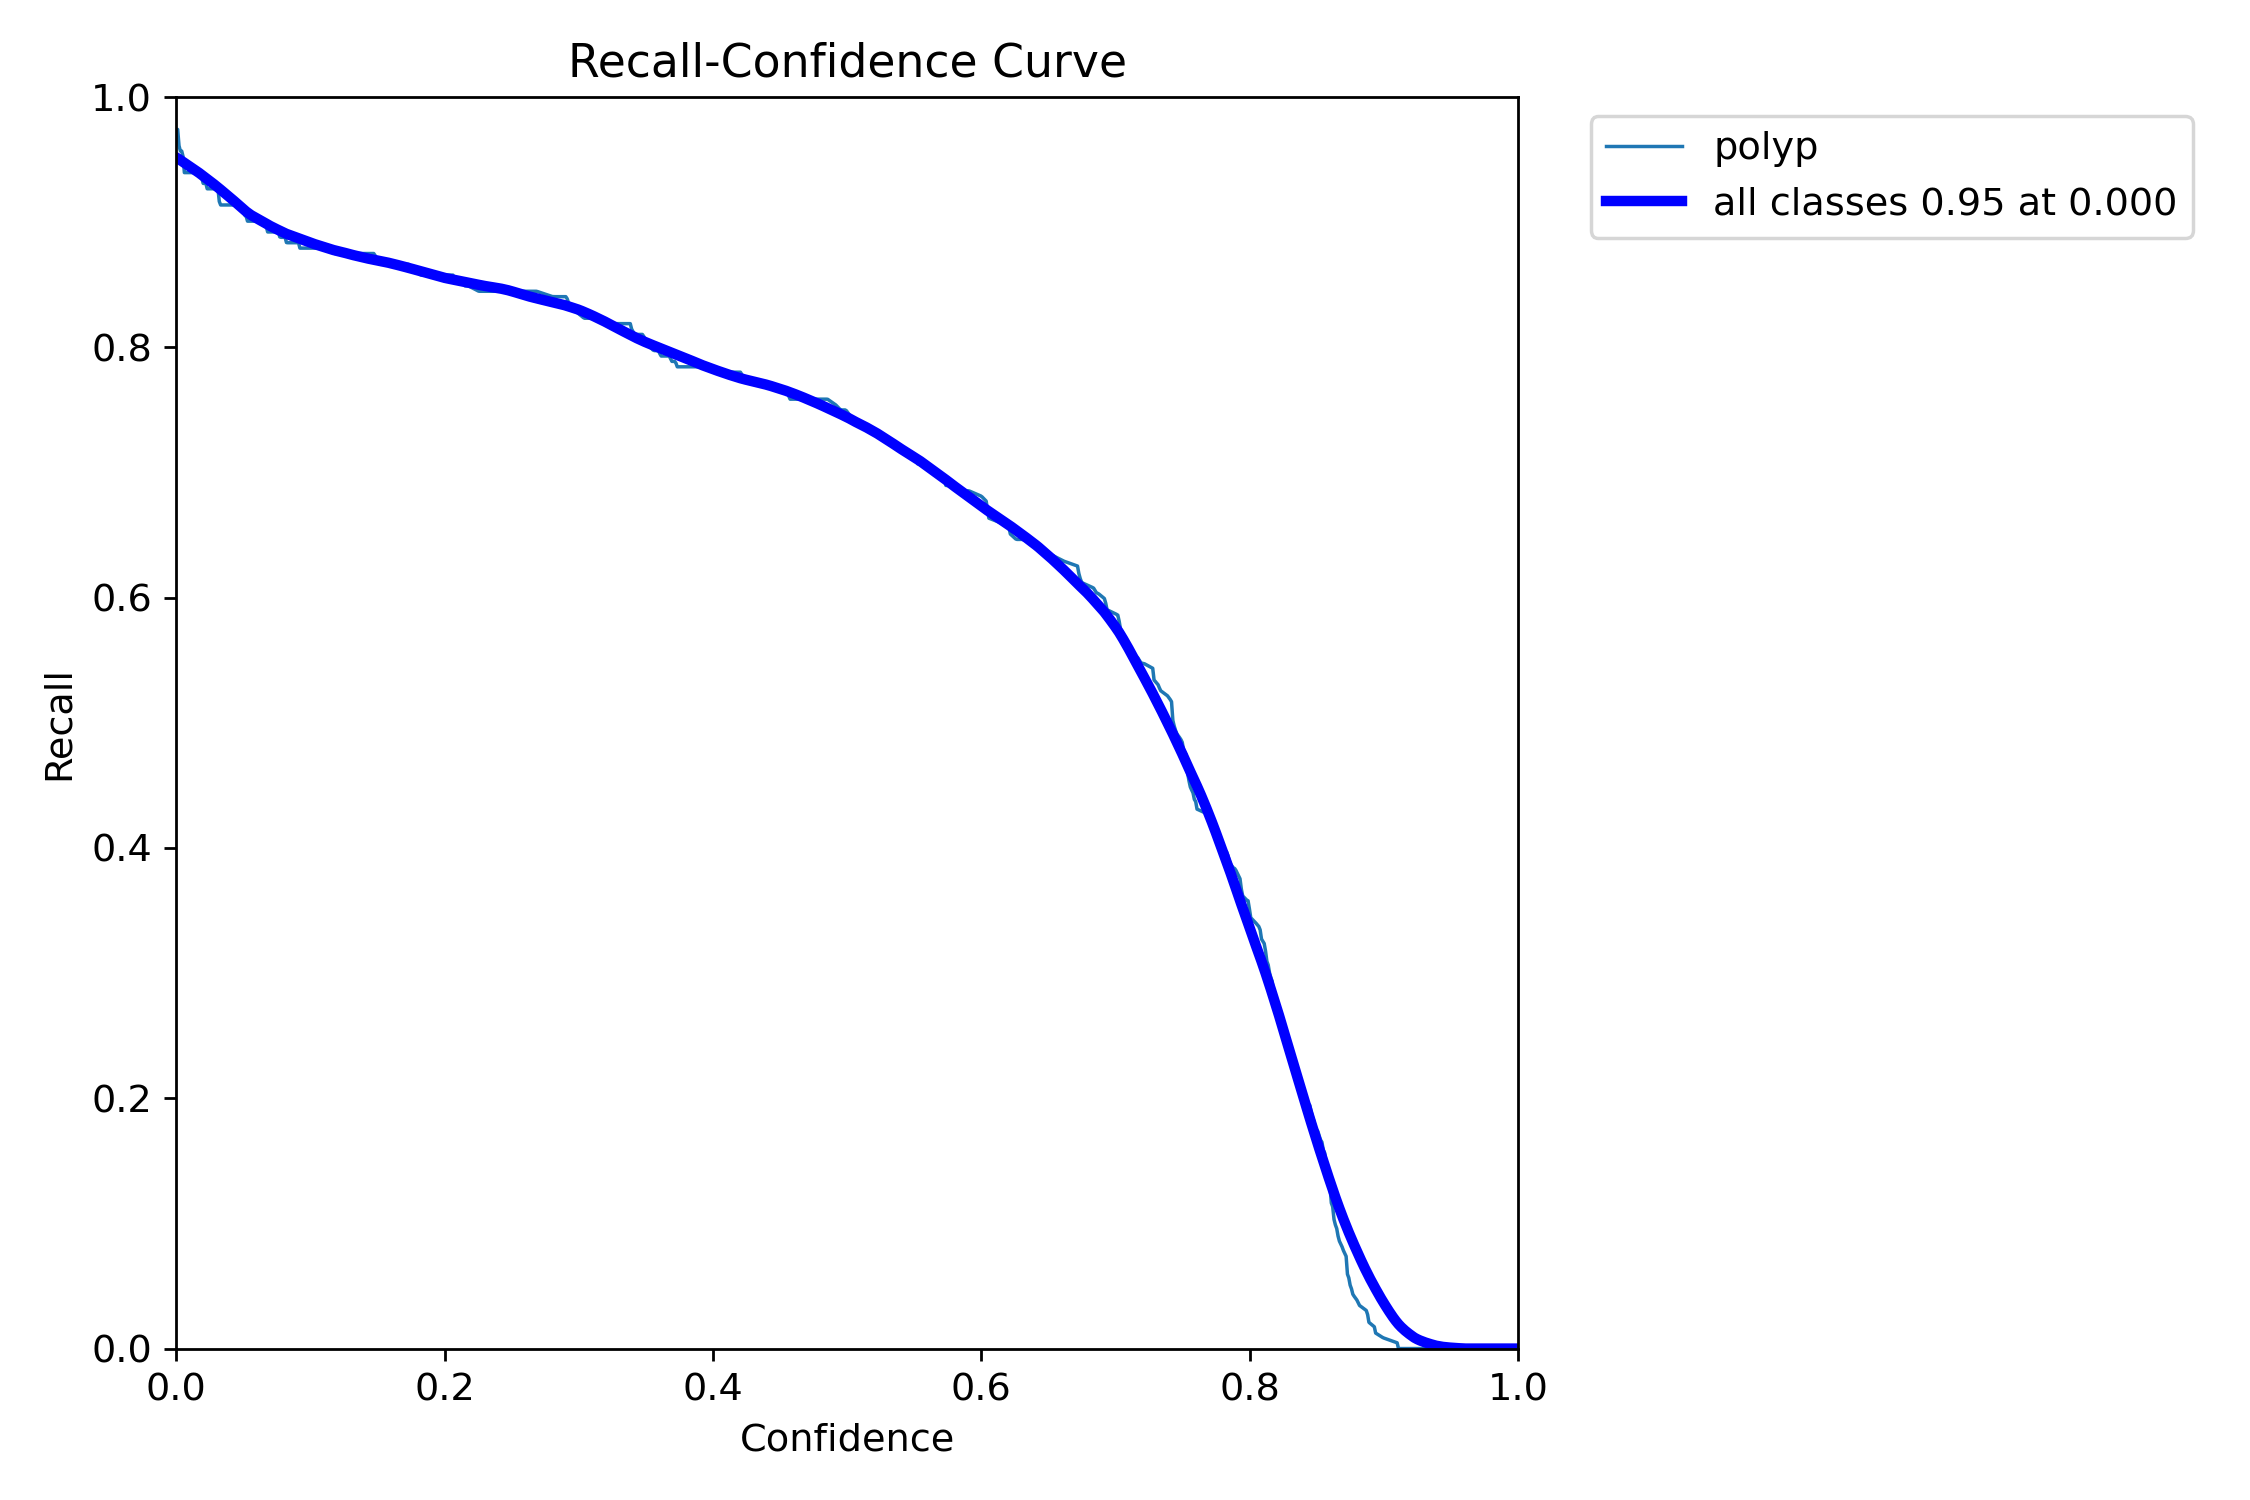

In [ ]:
Image(filename=f'/content/runs/detect/train/BoxR_curve.png', width=1000)

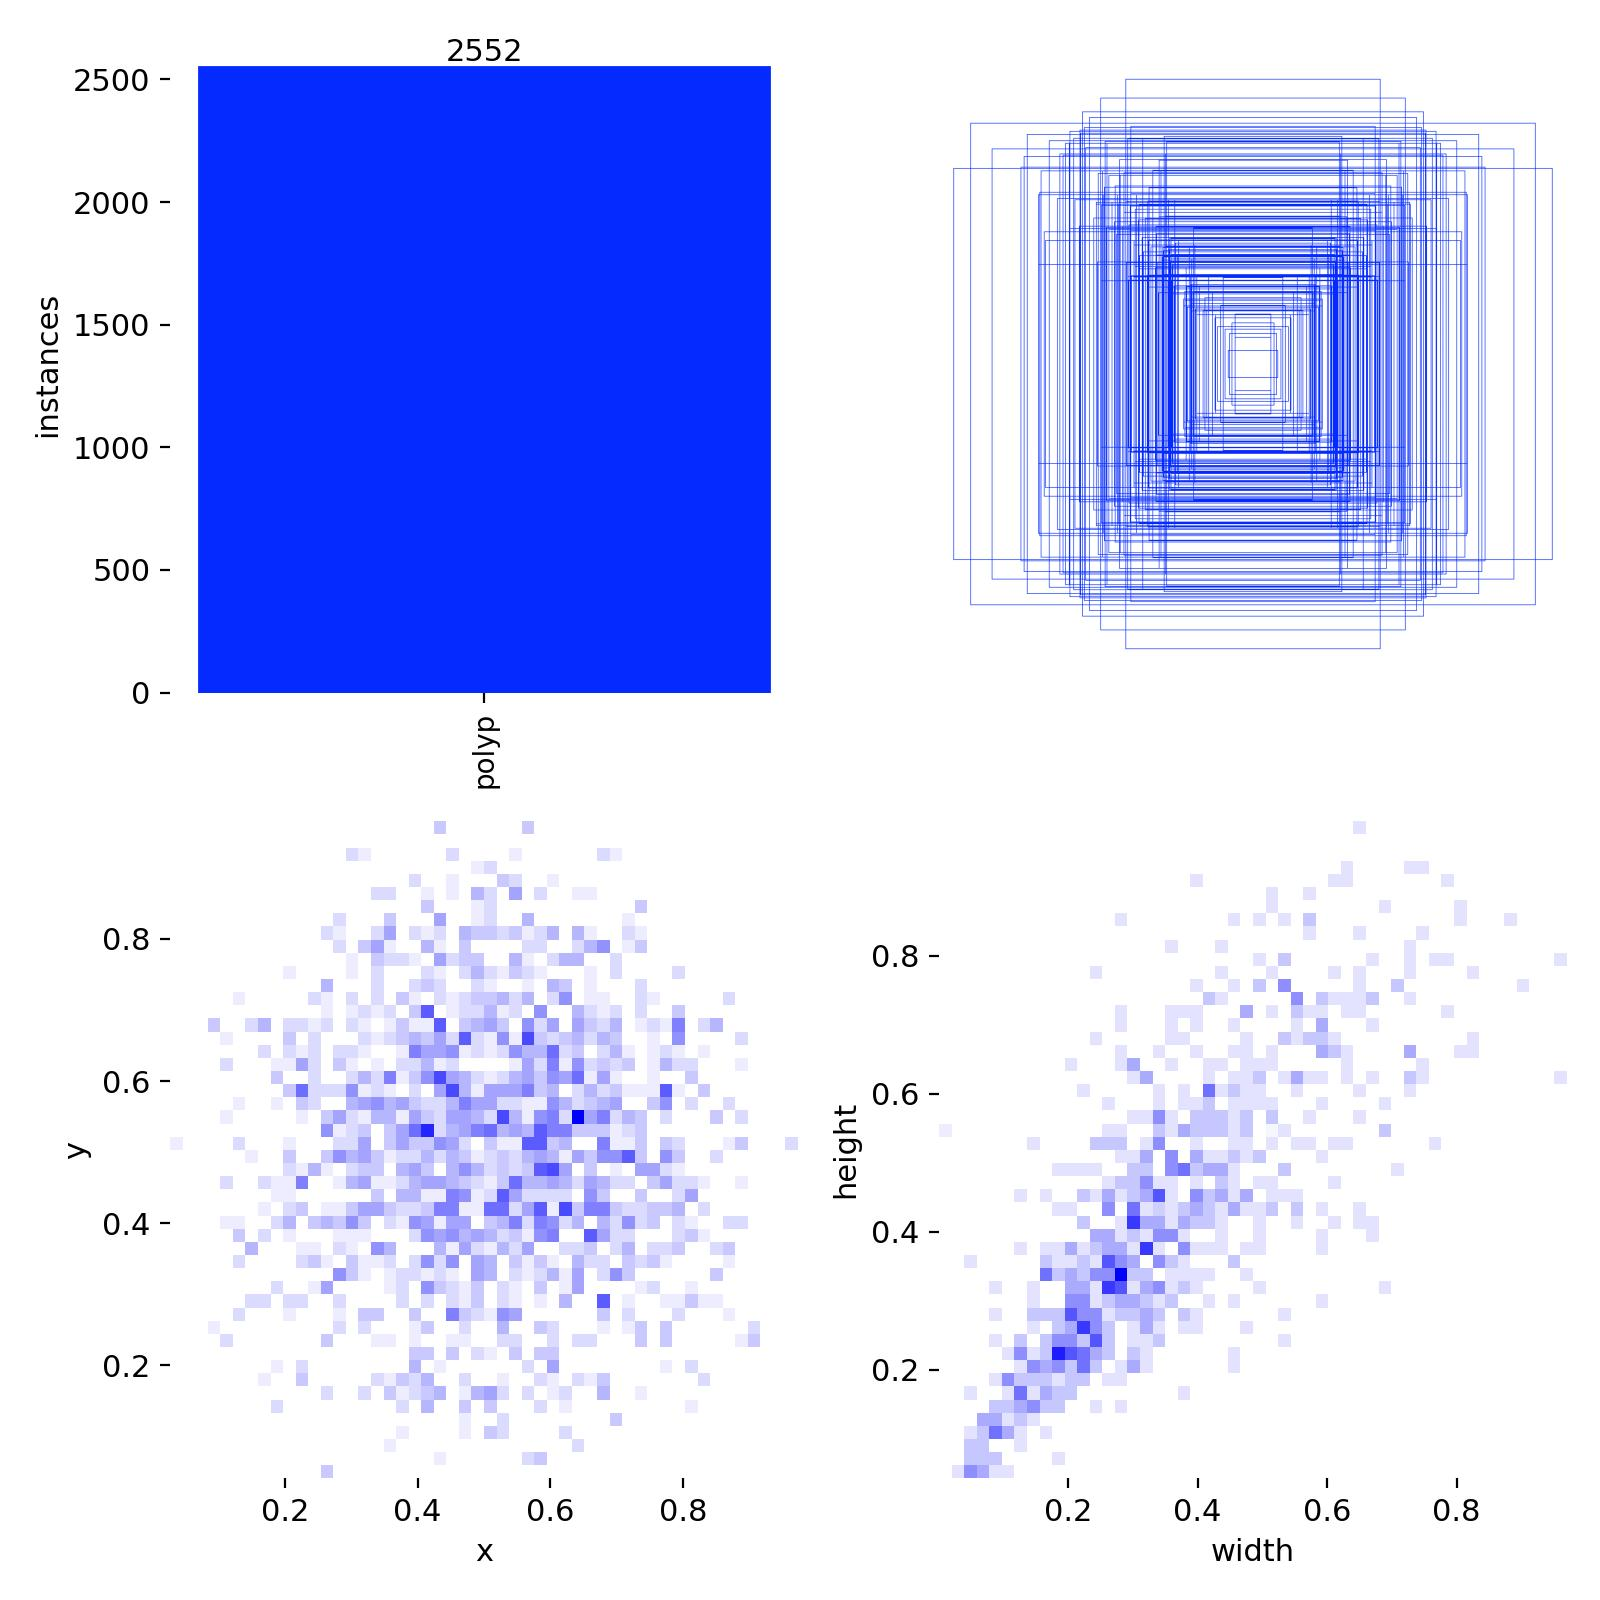

In [ ]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width=1000)

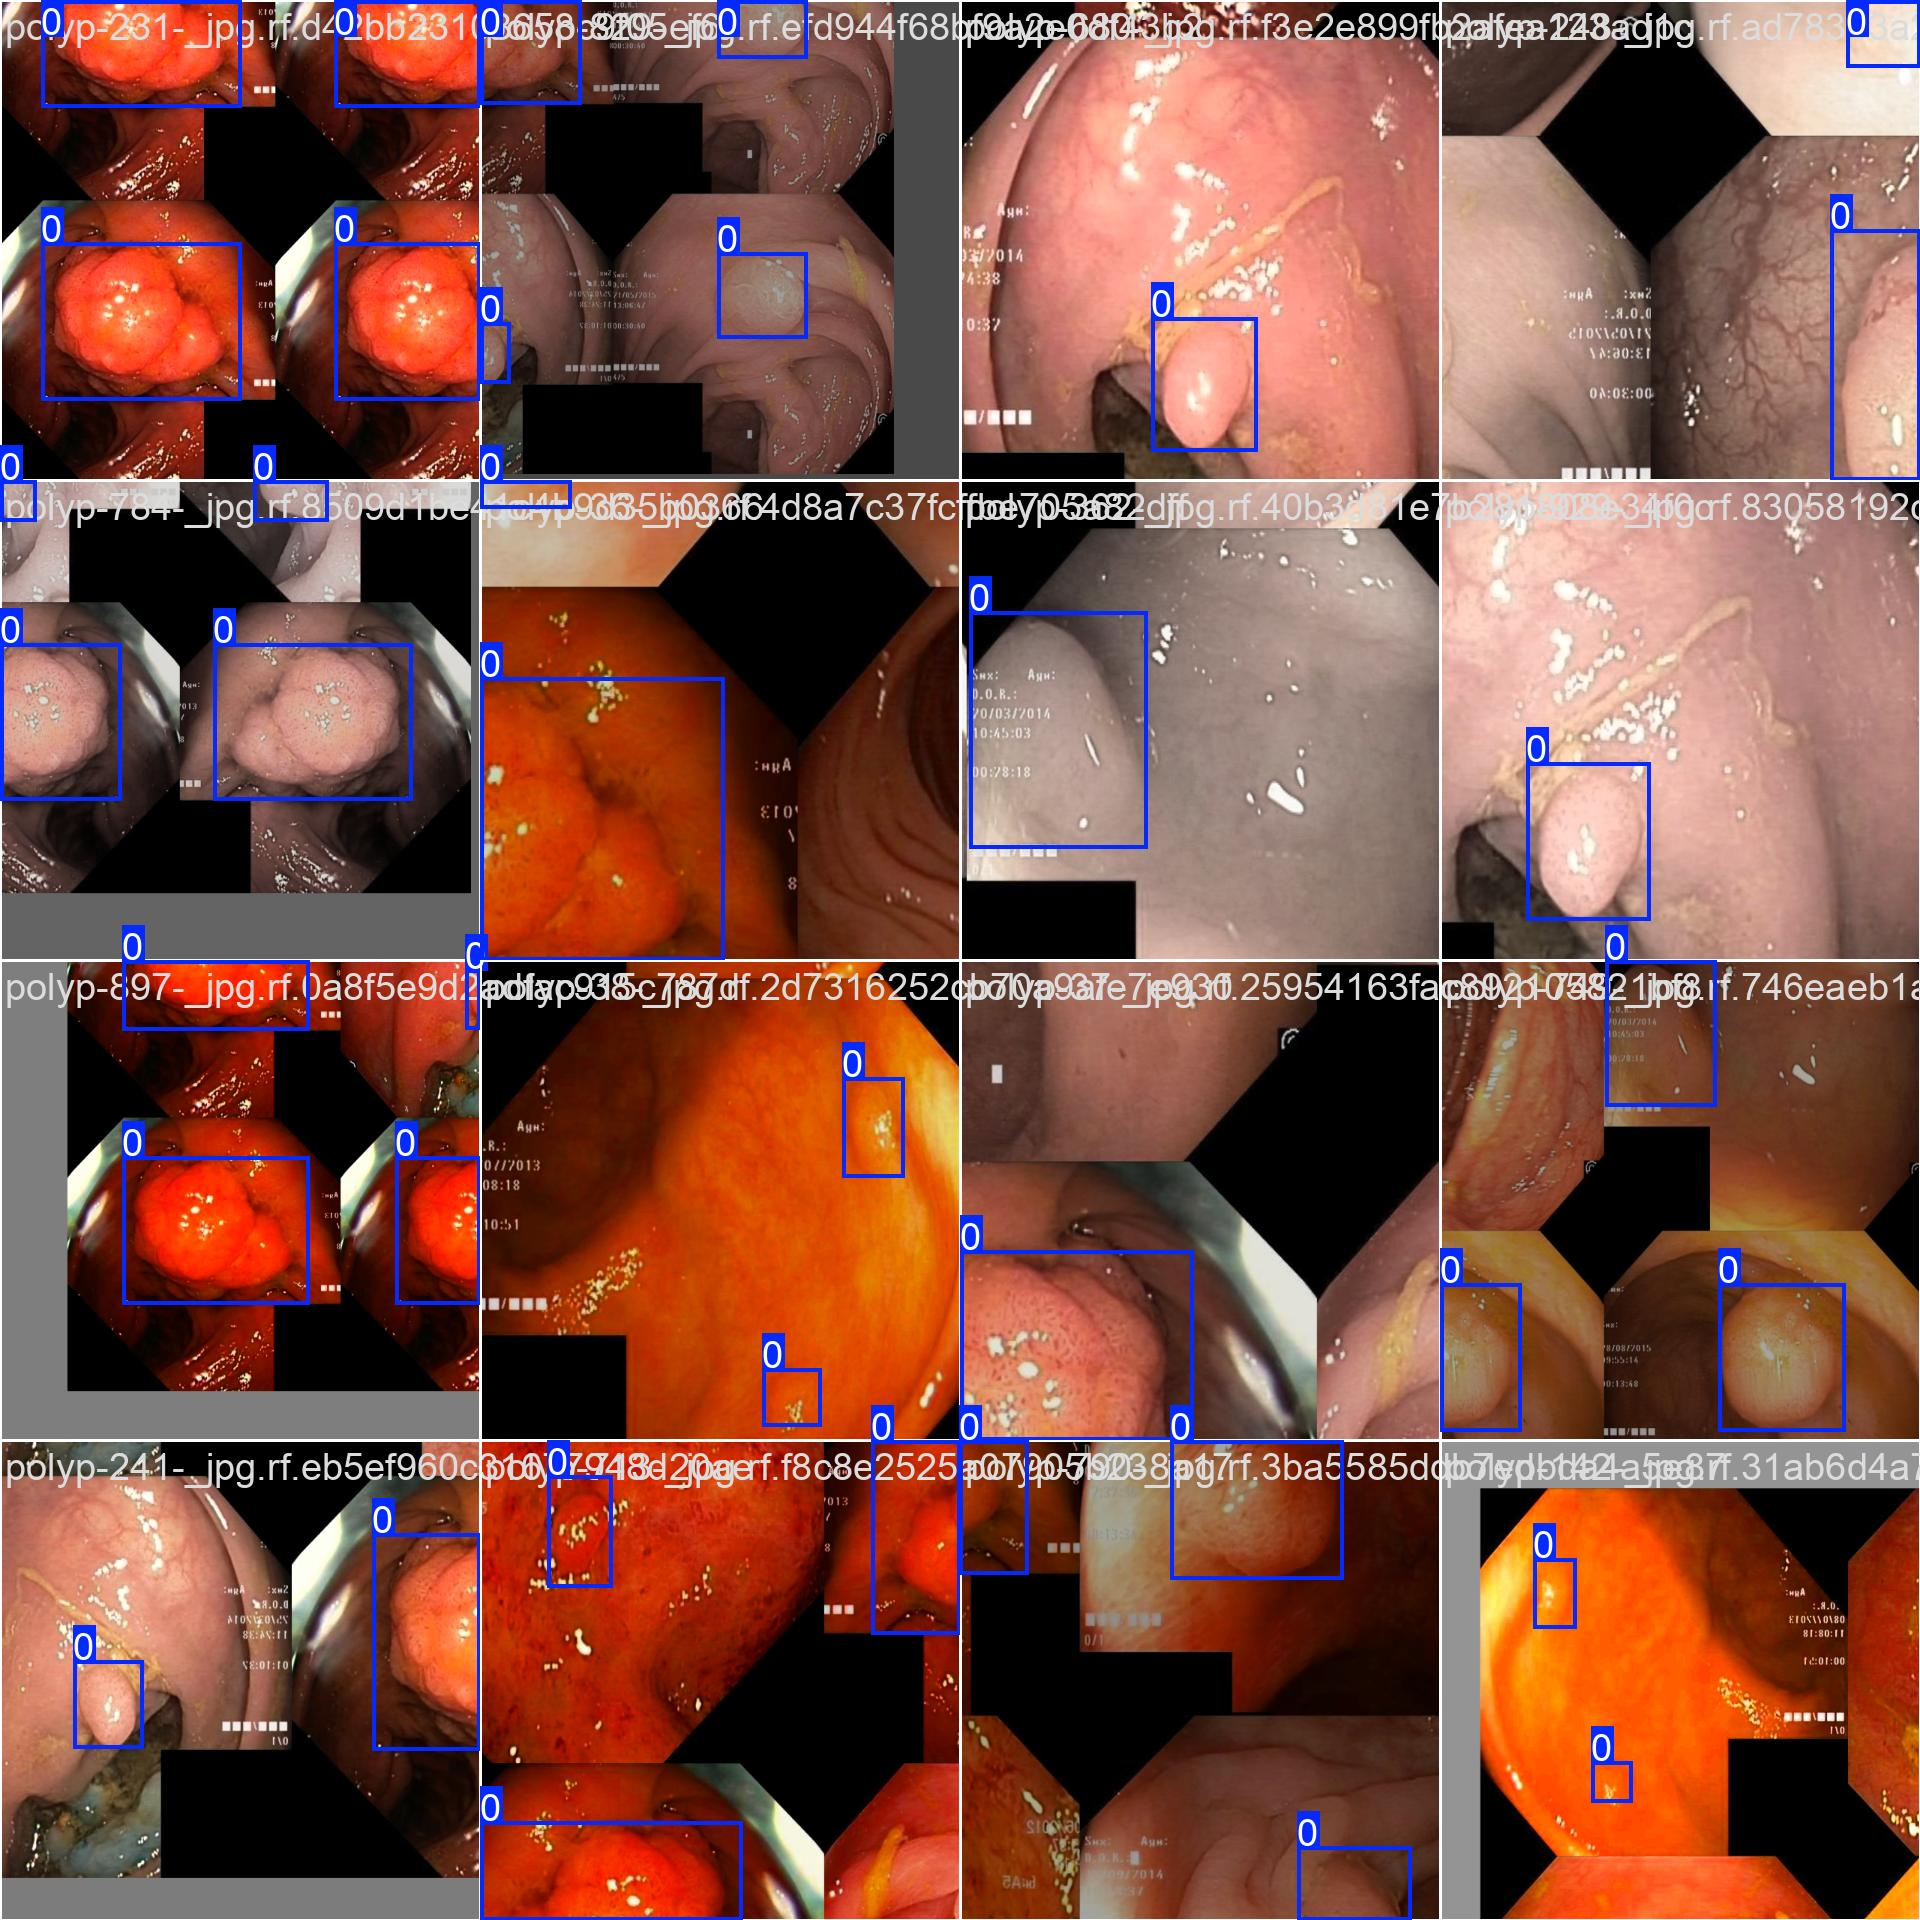

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=1000)

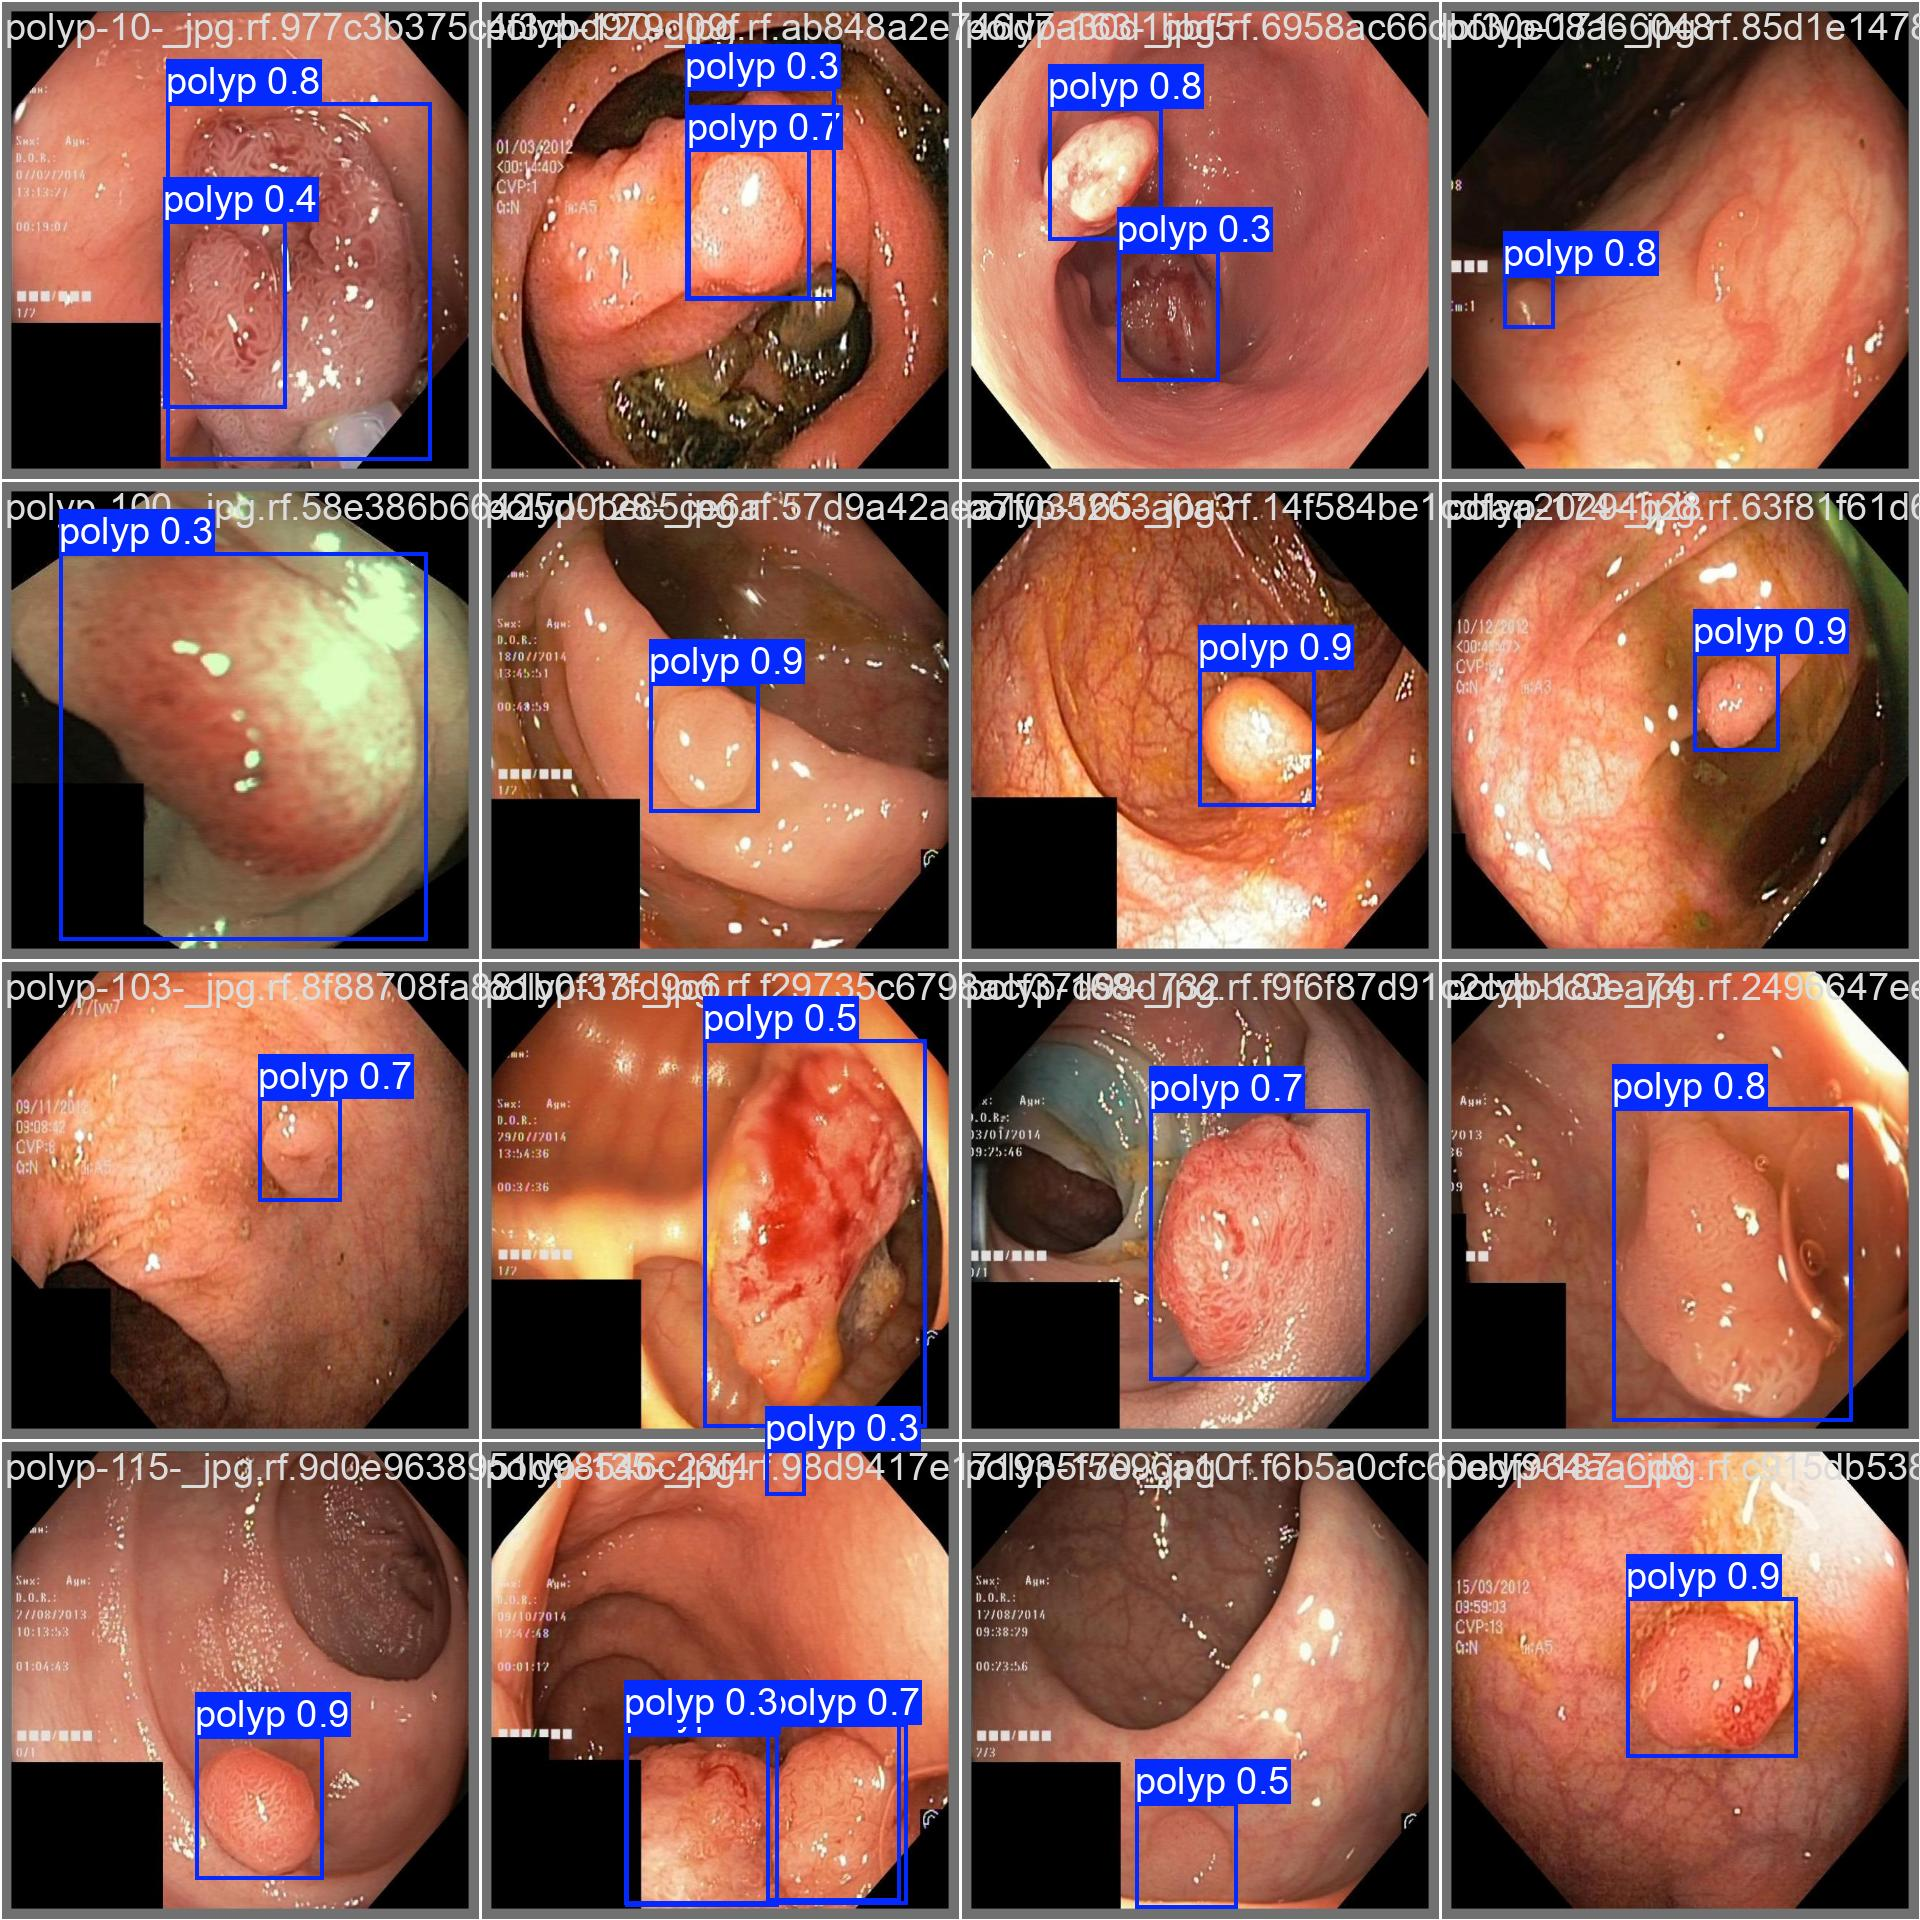

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=1000)

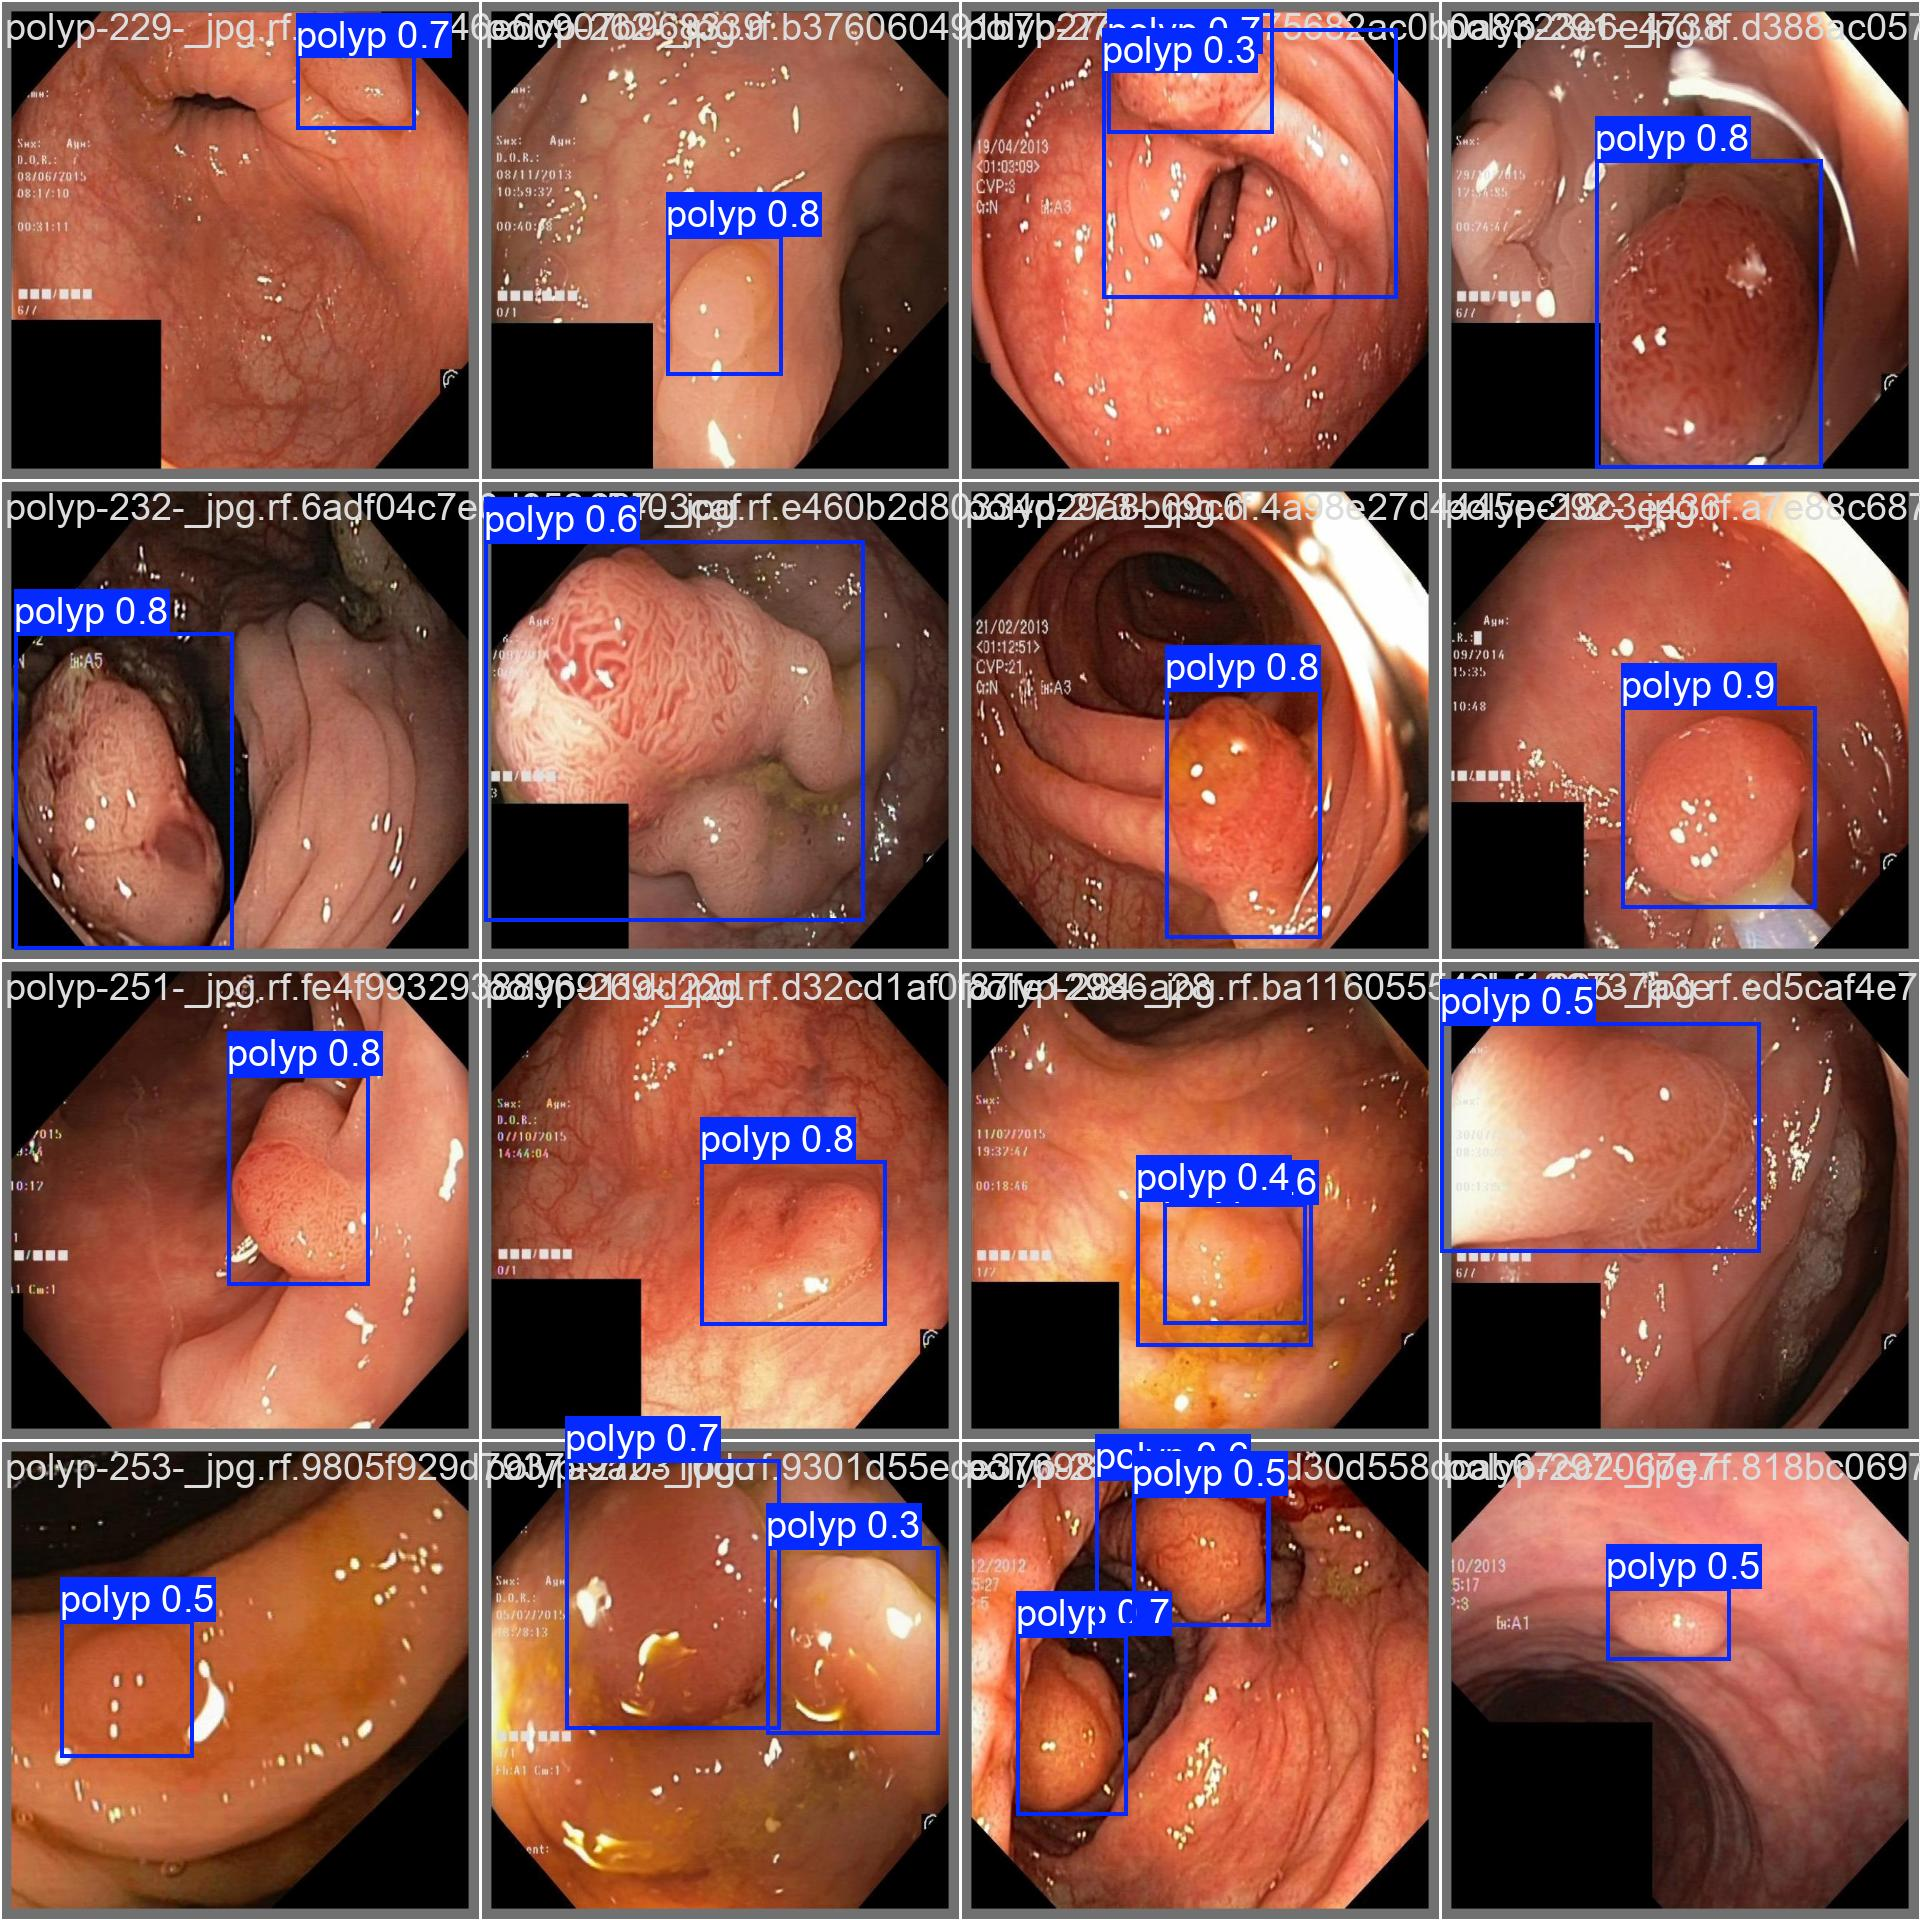

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_pred.jpg', width=1000)

Download the Model Weights from the Google Drive

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1088.6±100.9 MB/s, size: 34.7 KB)
val: Scanning /content/polyp_detection-4/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 105.4Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 232. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 2.7it/s 4.8s
                   all        200        232      0.882      0.772      0.871      0.568
Speed: 2.3ms preprocess, 14.0ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect

In [ ]:
dataset.location

'/content/polyp_detection-4'

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs

image 1/100 /content/polyp_detection-4/test/images/polyp-101-_jpg.rf.a39e9b6e93f5d026d372871050bf4d16.jpg: 640x640 (no detections), 52.9ms
image 2/100 /content/polyp_detection-4/test/images/polyp-105-_jpg.rf.d34e2f56eeea851e5e2835d2f23f4a7a.jpg: 640x640 1 polyp, 21.9ms
image 3/100 /content/polyp_detection-4/test/images/polyp-106-_jpg.rf.1bddaecd5a2f17c8e991e08d784e223a.jpg: 640x640 1 polyp, 20.9ms
image 4/100 /content/polyp_detection-4/test/images/polyp-116-_jpg.rf.1c25fa13ccfe40cadda1cd7edb1ea98a.jpg: 640x640 1 polyp, 20.9ms
image 5/100 /content/polyp_detection-4/test/images/polyp-123-_jpg.rf.17f85548166088b8c71d10e7b82d1535.jpg: 640x640 1 polyp, 20.9ms
image 6/100 /content/polyp_detection-4/test/images/polyp-129-_jpg.rf.6f445ad115515e1a5bb5053ac180425c.jpg: 640x640 1 polyp, 20.9ms
image 7/100 /content/polyp_detection-4

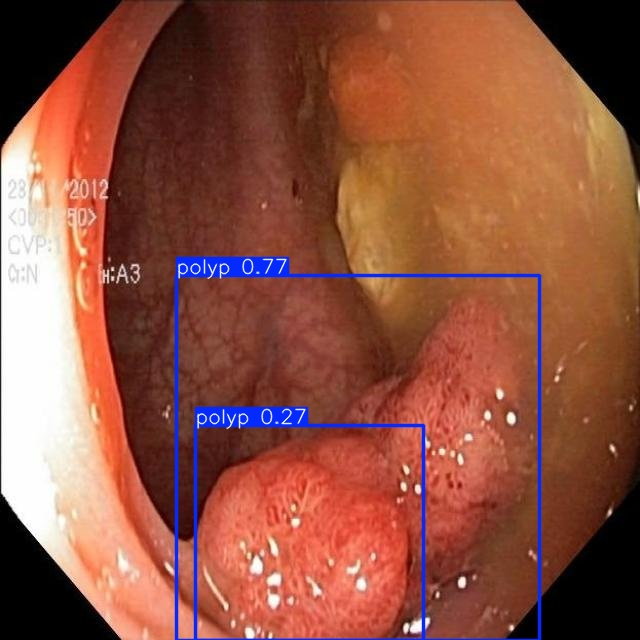

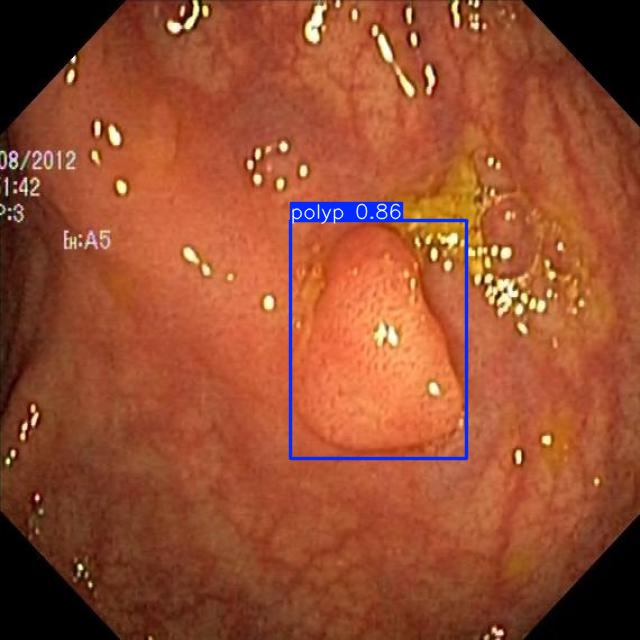

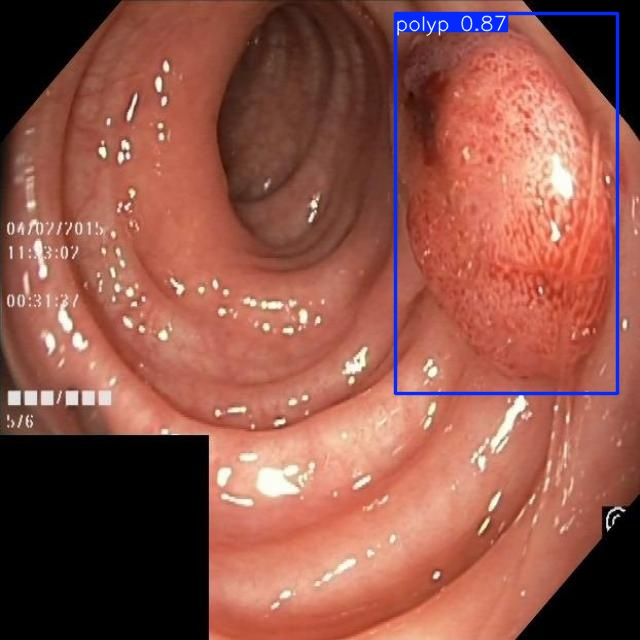

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")